In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:

#log = xes_importer.apply('data/2000casebpi2019.xes')
log = xes_importer.apply('../data/cpntoolsim2.xes')

parsing log, completed traces ::   0%|          | 0/724 [00:00<?, ?it/s]

In [4]:
print(log[0])

{'attributes': {'concept:name': '1'}, 'events': [{'concept:name': 'a', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2015, 1, 5, 0, 1, 16, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'concept:name': 'h', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2015, 1, 5, 13, 6, 28, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]}


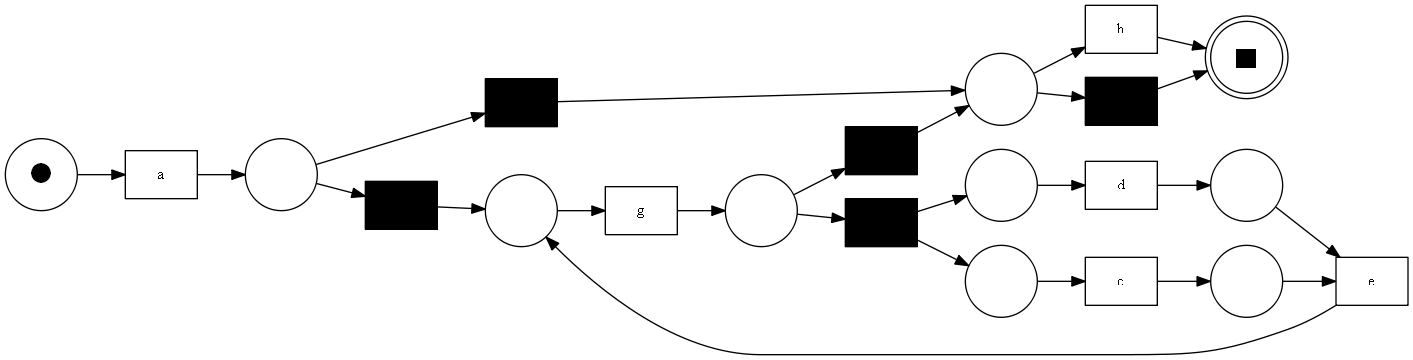

In [5]:

net, initial_marking, final_marking = pnml_importer.apply("../data/cpntoolsim2pn.pnml")    


gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [6]:

replayed_traces = token_replay.apply(log, net, initial_marking, final_marking)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
for trace in replayed_traces:
    print(trace)

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n10, 'a'), (n12, 'b'), (n13, 'd'), (n14, 'c'), (n15, 'e'), (n16, 'g'), (n17, 'h')], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 9, 'remaining_tokens': 0, 'produced_tokens': 9}
{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n10, 'a'), (n12, 'b'), (n14, 'c'), (n13, 'd'), (n15, 'e'), (n16, 'g'), (n17, 'h')], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 9, 'remaining_tokens': 0, 'produced_tokens': 9}
{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(n10, 'a'), (n12, 'b'), (n13, 'd'), (n14, 'c'), (n15, 'e'), (n16, 'g'), (n17, 'h')], 'reached_marking': ['n2:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 9, 'rem

In [8]:
len(replayed_traces)

724

In [7]:
net

places: [ n1, n10, n2, n3, n4, n5, n6, n7, n8, n9 ]
transitions: [ (n11, 'a'), (n12, None), (n13, None), (n14, 'g'), (n15, None), (n16, 'd'), (n17, 'c'), (n18, 'e'), (n19, None), (n20, None), (n21, 'h') ]
arcs: [ (n11, 'a')->n3, (n12, None)->n4, (n13, None)->n6, (n14, 'g')->n5, (n15, None)->n7, (n15, None)->n9, (n16, 'd')->n8, (n17, 'c')->n10, (n18, 'e')->n6, (n19, None)->n4, (n20, None)->n2, (n21, 'h')->n2, n1->(n11, 'a'), n10->(n18, 'e'), n3->(n12, None), n3->(n13, None), n4->(n20, None), n4->(n21, 'h'), n5->(n15, None), n5->(n19, None), n6->(n14, 'g'), n7->(n16, 'd'), n8->(n18, 'e'), n9->(n17, 'c') ]

In [10]:
##usage= get_labels_set(input_transition_set)
def get_labels_set(input_transition_set):
    label_set=set()
    for transition in input_transition_set:
        label_set.add(transition._Transition__get_label())
    return label_set

In [11]:
##usage= get_input_transitions('n4')
def get_initial_start(intial_place):
    for place in net.places:
        if place._Place__get_name()==intial_place:
            initial_start=place
    return initial_start

In [12]:
##usage= get_input_transitions(net,initial_start)
def get_input_transitions(net,place):
    transition=list()
    if place in net.places:
        for arc in net.arcs:
            if arc._Arc__get_target()==place:
                if arc._Arc__get_source()._Transition__get_label() is None:
                    for new_place in arc._Arc__get_source()._Transition__get_in_arcs():
                        transition.extend(get_input_transitions(net,new_place._Arc__get_source()))
                else:
                    transition.append(arc._Arc__get_source())
        return transition
    else:
        return None

In [13]:
##usage= get_output_transitions(net,initial_start)
def get_output_transitions(net,place):
    transition=list()
    if place in net.places:
        for arc in net.arcs:
            if arc._Arc__get_source()==place:
                if arc._Arc__get_target()._Transition__get_label() is None:
                    for new_place in arc._Arc__get_target()._Transition__get_out_arcs():
                        transition.extend(get_output_transitions(net,new_place._Arc__get_target()))
                else:
                    transition.append(arc._Arc__get_target())
        return transition
    else:
        return None

# for sample log n4,n6 (Predictor Zone)
Input
   {(n98, 'Record Goods Receipt'), (n99, 'Vendor creates invoice')->(n42,n40)
    
Output-
    (n42,n40)->('Record Invoice Receipt') 

In [20]:
input_transition_set=set()
input_transition_label_set=set()
output_transition_set=set()
output_transition_label_set=set()
for start in ['n4','n6']:
    initial_start=get_initial_start(start)
    input_transition_set|=set(get_input_transitions(net,initial_start))
    temp=input_transition_set.difference(output_transition_set)
    output_transition_set|=set(get_output_transitions(net,initial_start))
    output_transition_set.difference_update(input_transition_set)
    input_transition_set=temp


input_transition_label_set|=get_labels_set(input_transition_set)    
output_transition_label_set|=get_labels_set(output_transition_set)


print(input_transition_set)
print(input_transition_label_set)
print(output_transition_set)
print(output_transition_label_set)

token_produced=0
token_consumed=0
token_left=0
predictordf=pd.DataFrame(columns= ['StartEvent','StartTime','EndEvent','EndTime','User'])
for trace,case in zip(replayed_traces, log):
    last_event=None
    first_event=None
    if trace['trace_is_fit']==True:
        for active_trace in trace['activated_transitions']:
            if active_trace in input_transition_set :
                for events in case:
                    if events['concept:name'] in input_transition_label_set:
                        last_event=events
            if active_trace in output_transition_set:
                for events in case:
                    if events['concept:name'] in output_transition_label_set and first_event is None:
                        first_event=events
    if last_event is not None and first_event is not None:
        token_produced=token_produced+1
        token_consumed=token_consumed+1
        row_df = pd.DataFrame([[last_event['concept:name'], last_event['time:timestamp'],first_event['concept:name'], first_event['time:timestamp'], case.attributes['concept:name']]],columns= ['StartEvent','StartTime','EndEvent','EndTime','User'])
        predictordf = pd.concat([row_df, predictordf], ignore_index=True)
    
print(token_produced)
print(token_consumed)

predictordf

{(n12, 'b')}
{'b'}
{(n13, 'd'), (n14, 'c')}
{'c', 'd'}
260
260


StartEvent                 StartTime EndEvent                   EndTime  \
0            b 2015-01-07 05:48:55+01:00        d 2015-01-07 06:15:29+01:00   
1            b 2015-01-07 05:40:22+01:00        d 2015-01-07 05:48:55+01:00   
2            b 2015-01-07 05:03:16+01:00        d 2015-01-07 05:40:22+01:00   
3            b 2015-01-07 04:50:26+01:00        c 2015-01-07 05:03:16+01:00   
4            b 2015-01-07 04:23:02+01:00        d 2015-01-07 04:50:26+01:00   
..         ...                       ...      ...                       ...   
255          b 2015-01-07 07:49:06+01:00        d 2015-01-07 08:22:51+01:00   
256          b 2015-01-07 06:52:44+01:00        d 2015-01-07 07:49:06+01:00   
257          b 2015-01-07 06:15:29+01:00        d 2015-01-07 06:52:44+01:00   
258          b 2015-01-05 06:25:12+01:00        c 2015-01-05 06:52:05+01:00   
259          b 2015-01-05 00:00:26+01:00        d 2015-01-05 00:46:03+01:00   

    User  
0     99  
1     98  
2     97  
3     96  
4     95  
..   ...  
255  102  
256  101  
257  100  
258   10  
259    1  

[260 rows x 5 columns]

In [50]:
predictordf['StartDateTime'] = pd.to_datetime(predictordf['StartTime'], utc=True)
predictordf['StartDate'] = pd.to_datetime(predictordf['StartDateTime']).dt.date
predictordf['EndDateTime'] = pd.to_datetime(predictordf['EndTime'], utc=True)
predictordf['EndDate'] = pd.to_datetime(predictordf['EndDateTime']).dt.date
predictordf['TotalWaitingTime']=  (pd.to_datetime(predictordf['EndTime'], utc=True)-pd.to_datetime(predictordf['StartTime'], utc=True))
minstartdate=min(predictordf['StartDateTime'])
maxenddate=max(predictordf['EndDateTime'])

In [61]:
predictordf

StartEvent                 StartTime EndEvent                   EndTime  \
0            b 2015-01-07 05:48:55+01:00        d 2015-01-07 06:15:29+01:00   
1            b 2015-01-07 05:40:22+01:00        d 2015-01-07 05:48:55+01:00   
2            b 2015-01-07 05:03:16+01:00        d 2015-01-07 05:40:22+01:00   
3            b 2015-01-07 04:50:26+01:00        c 2015-01-07 05:03:16+01:00   
4            b 2015-01-07 04:23:02+01:00        d 2015-01-07 04:50:26+01:00   
..         ...                       ...      ...                       ...   
255          b 2015-01-07 07:49:06+01:00        d 2015-01-07 08:22:51+01:00   
256          b 2015-01-07 06:52:44+01:00        d 2015-01-07 07:49:06+01:00   
257          b 2015-01-07 06:15:29+01:00        d 2015-01-07 06:52:44+01:00   
258          b 2015-01-05 06:25:12+01:00        c 2015-01-05 06:52:05+01:00   
259          b 2015-01-05 00:00:26+01:00        d 2015-01-05 00:46:03+01:00   

    User             StartDateTime   StartDate               EndDateTime  \
0     99 2015-01-07 04:48:55+00:00  2015-01-07 2015-01-07 05:15:29+00:00   
1     98 2015-01-07 04:40:22+00:00  2015-01-07 2015-01-07 04:48:55+00:00   
2     97 2015-01-07 04:03:16+00:00  2015-01-07 2015-01-07 04:40:22+00:00   
3     96 2015-01-07 03:50:26+00:00  2015-01-07 2015-01-07 04:03:16+00:00   
4     95 2015-01-07 03:23:02+00:00  2015-01-07 2015-01-07 03:50:26+00:00   
..   ...                       ...         ...                       ...   
255  102 2015-01-07 06:49:06+00:00  2015-01-07 2015-01-07 07:22:51+00:00   
256  101 2015-01-07 05:52:44+00:00  2015-01-07 2015-01-07 06:49:06+00:00   
257  100 2015-01-07 05:15:29+00:00  2015-01-07 2015-01-07 05:52:44+00:00   
258   10 2015-01-05 05:25:12+00:00  2015-01-05 2015-01-05 05:52:05+00:00   
259    1 2015-01-04 23:00:26+00:00  2015-01-04 2015-01-04 23:46:03+00:00   

        EndDate TotalWaitingTime  
0    2015-01-07  0 days 00:26:34  
1    2015-01-07  0 days 00:08:33  
2    2015-01-07  0 days 00:37:06  
3    2015-01-07  0 days 00:12:50  
4    2015-01-07  0 days 00:27:24  
..          ...              ...  
255  2015-01-07  0 days 00:33:45  
256  2015-01-07  0 days 00:56:22  
257  2015-01-07  0 days 00:37:15  
258  2015-01-05  0 days 00:26:53  
259  2015-01-04  0 days 00:45:37  

[260 rows x 10 columns]

In [62]:
if (maxenddate-minstartdate).seconds < 3000:
    timewindow='S'
elif (maxenddate-minstartdate).seconds/60 < 3000:
    timewindow='T'
elif (maxenddate-minstartdate).seconds/3600 < 3000:
    timewindow='H'
elif (maxenddate-minstartdate).seconds/(3600*24) < 3000:
    timewindow='D'
elif (maxenddate-minstartdate).seconds/(3600*24*30) < 3000:
    timewindow='M'
elif (maxenddate-minstartdate).seconds/(3600*24*30*12) < 3000:
    timewindow='Y' 
print((maxenddate-minstartdate).seconds)


75203


In [63]:
periodfreq=len(predictordf)/5
predictordatedataframe = pd.DataFrame({'date':pd.date_range(start=minstartdate, end=maxenddate, periods=periodfreq,normalize=True),'tokenproduced':0,'tokenconsumed':0,'tokenleft':0,'WaitingTime':0,'Count':0})
predictordatedataframe 

date  tokenproduced  tokenconsumed  \
0            2015-01-04 00:00:00+00:00              0              0   
1  2015-01-04 02:49:24.705882352+00:00              0              0   
2  2015-01-04 05:38:49.411764705+00:00              0              0   
3  2015-01-04 08:28:14.117647058+00:00              0              0   
4  2015-01-04 11:17:38.823529411+00:00              0              0   
5  2015-01-04 14:07:03.529411764+00:00              0              0   
6  2015-01-04 16:56:28.235294117+00:00              0              0   
7  2015-01-04 19:45:52.941176470+00:00              0              0   
8  2015-01-04 22:35:17.647058823+00:00              0              0   
9  2015-01-05 01:24:42.352941176+00:00              0              0   
10 2015-01-05 04:14:07.058823529+00:00              0              0   
11 2015-01-05 07:03:31.764705882+00:00              0              0   
12 2015-01-05 09:52:56.470588235+00:00              0              0   
13 2015-01-05 12:42:21.176470588+00:00              0              0   
14 2015-01-05 15:31:45.882352941+00:00              0              0   
15 2015-01-05 18:21:10.588235294+00:00              0              0   
16 2015-01-05 21:10:35.294117647+00:00              0              0   
17           2015-01-06 00:00:00+00:00              0              0   
18 2015-01-06 02:49:24.705882352+00:00              0              0   
19 2015-01-06 05:38:49.411764705+00:00              0              0   
20 2015-01-06 08:28:14.117647058+00:00              0              0   
21 2015-01-06 11:17:38.823529411+00:00              0              0   
22 2015-01-06 14:07:03.529411764+00:00              0              0   
23 2015-01-06 16:56:28.235294117+00:00              0              0   
24 2015-01-06 19:45:52.941176470+00:00              0              0   
25 2015-01-06 22:35:17.647058823+00:00              0              0   
26 2015-01-07 01:24:42.352941176+00:00              0              0   
27 2015-01-07 04:14:07.058823529+00:00              0              0   
28 2015-01-07 07:03:31.764705882+00:00              0              0   
29 2015-01-07 09:52:56.470588235+00:00              0              0   
30 2015-01-07 12:42:21.176470588+00:00              0              0   
31 2015-01-07 15:31:45.882352941+00:00              0              0   
32 2015-01-07 18:21:10.588235294+00:00              0              0   
33 2015-01-07 21:10:35.294117647+00:00              0              0   
34           2015-01-08 00:00:00+00:00              0              0   
35 2015-01-08 02:49:24.705882352+00:00              0              0   
36 2015-01-08 05:38:49.411764705+00:00              0              0   
37 2015-01-08 08:28:14.117647058+00:00              0              0   
38 2015-01-08 11:17:38.823529411+00:00              0              0   
39 2015-01-08 14:07:03.529411764+00:00              0              0   
40 2015-01-08 16:56:28.235294117+00:00              0              0   
41 2015-01-08 19:45:52.941176470+00:00              0              0   
42 2015-01-08 22:35:17.647058823+00:00              0              0   
43 2015-01-09 01:24:42.352941176+00:00              0              0   
44 2015-01-09 04:14:07.058823529+00:00              0              0   
45 2015-01-09 07:03:31.764705882+00:00              0              0   
46 2015-01-09 09:52:56.470588235+00:00              0              0   
47 2015-01-09 12:42:21.176470588+00:00              0              0   
48 2015-01-09 15:31:45.882352941+00:00              0              0   
49 2015-01-09 18:21:10.588235294+00:00              0              0   
50 2015-01-09 21:10:35.294117647+00:00              0              0   
51           2015-01-10 00:00:00+00:00              0              0   

    tokenleft  WaitingTime  Count  
0           0            0      0  
1           0            0      0  
2           0            0      0  
3           0            0      0  
4           0            0      0  
5

In [64]:
from datetime import timedelta as td
for index, row in predictordatedataframe.iterrows():
    currentdate=row['date']
    produced=0
    left=0
    consumed=0
    waiting=td(days=0)
    waitingdays=0
    #print(type(waiting))
    count=0
    for indexdata, rowdata in predictordf.iterrows():
        StartDate=rowdata['StartDate']
        EndDate=rowdata['EndDate']
        #TotalWaitingTime=rowdata['TotalWaitingTime']
        TotalWaitingTime=rowdata['TotalWaitingTime']
        #print(type(waiting)," ",type(TotalWaitingTime))
        WaitingTimeTillDate=currentdate+td(hours=24)
        if currentdate.date()==StartDate:
            produced=produced+1
        if currentdate.date()==EndDate:
            consumed=consumed+1
            WaitingTimeTillDate=rowdata['EndDateTime']
        if currentdate.date()<EndDate and currentdate.date()>=StartDate:
            left=left+1
        if currentdate.date()<=EndDate and currentdate.date()>=StartDate:
            TotalWaitingTime=WaitingTimeTillDate.replace(tzinfo=None)-rowdata['StartDateTime'].replace(tzinfo=None)
            if waiting is None:
                waiting=TotalWaitingTime
            else:
                if waiting.days<100000:
                    waiting=waiting+TotalWaitingTime
                    waitingdays=waiting.days
                else :
                    waitingdays=TotalWaitingTime.days+waitingdays
            count=count+1
    predictordatedataframe.at[index, 'tokenproduced']=produced
    predictordatedataframe.at[index, 'tokenconsumed']=consumed
    predictordatedataframe.at[index, 'tokenleft']=left
    if waiting.days<100000:
        predictordatedataframe.at[index, 'WaitingTime']=waiting
    else:
        predictordatedataframe.at[index, 'WaitingTime']=waitingdays
    predictordatedataframe.at[index, 'Count']=count

for index, row in datedataframe.iterrows():
    date=row['date']
    print(typedate.date())
    break
for indexdata, rowdata in df.iterrows():
    StartDate=rowdata['StartDate']
    break
from datetime import date 
datenew=date(2001, 1, 1)
print(type(StartDate))

datedataframe.sort_values(by='WaitingTime')
#datedataframe['WaitingTime']=datedataframe['WaitingTime'].fillna((pd.Timedelta(days=0)))

In [3]:
#predictordatedataframe.to_csv (r'C:\Users\bittu\RWTH\Thesis\bpi2019datasetinput.csv', index = False, header=True)

predictordatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2019datasetinput.csv')
predictordatedataframe['date']=pd.to_datetime(predictordatedataframe['date'])
predictordatedataframe['WaitingTime']=pd.to_timedelta(predictordatedataframe['WaitingTime'])

In [65]:
predictordatedataframe

date  tokenproduced  tokenconsumed  \
0            2015-01-04 00:00:00+00:00              2              1   
1  2015-01-04 02:49:24.705882352+00:00              2              1   
2  2015-01-04 05:38:49.411764705+00:00              2              1   
3  2015-01-04 08:28:14.117647058+00:00              2              1   
4  2015-01-04 11:17:38.823529411+00:00              2              1   
5  2015-01-04 14:07:03.529411764+00:00              2              1   
6  2015-01-04 16:56:28.235294117+00:00              2              1   
7  2015-01-04 19:45:52.941176470+00:00              2              1   
8  2015-01-04 22:35:17.647058823+00:00              2              1   
9  2015-01-05 01:24:42.352941176+00:00             40             40   
10 2015-01-05 04:14:07.058823529+00:00             40             40   
11 2015-01-05 07:03:31.764705882+00:00             40             40   
12 2015-01-05 09:52:56.470588235+00:00             40             40   
13 2015-01-05 12:42:21.176470588+00:00             40             40   
14 2015-01-05 15:31:45.882352941+00:00             40             40   
15 2015-01-05 18:21:10.588235294+00:00             40             40   
16 2015-01-05 21:10:35.294117647+00:00             40             40   
17           2015-01-06 00:00:00+00:00             49             49   
18 2015-01-06 02:49:24.705882352+00:00             49             49   
19 2015-01-06 05:38:49.411764705+00:00             49             49   
20 2015-01-06 08:28:14.117647058+00:00             49             49   
21 2015-01-06 11:17:38.823529411+00:00             49             49   
22 2015-01-06 14:07:03.529411764+00:00             49             49   
23 2015-01-06 16:56:28.235294117+00:00             49             49   
24 2015-01-06 19:45:52.941176470+00:00             49             49   
25 2015-01-06 22:35:17.647058823+00:00             49             49   
26 2015-01-07 01:24:42.352941176+00:00             45             45   
27 2015-01-07 04:14:07.058823529+00:00             45             45   
28 2015-01-07 07:03:31.764705882+00:00             45             45   
29 2015-01-07 09:52:56.470588235+00:00             45             45   
30 2015-01-07 12:42:21.176470588+00:00             45             45   
31 2015-01-07 15:31:45.882352941+00:00             45             45   
32 2015-01-07 18:21:10.588235294+00:00             45             45   
33 2015-01-07 21:10:35.294117647+00:00             45             45   
34           2015-01-08 00:00:00+00:00             54             54   
35 2015-01-08 02:49:24.705882352+00:00             54             54   
36 2015-01-08 05:38:49.411764705+00:00             54             54   
37 2015-01-08 08:28:14.117647058+00:00             54             54   
38 2015-01-08 11:17:38.823529411+00:00             54             54   
39 2015-01-08 14:07:03.529411764+00:00             54             54   
40 2015-01-08 16:56:28.235294117+00:00             54             54   
41 2015-01-08 19:45:52.941176470+00:00             54             54   
42 2015-01-08 22:35:17.647058823+00:00             54             54   
43 2015-01-09 01:24:42.352941176+00:00             38             38   
44 2015-01-09 04:14:07.058823529+00:00             38             38   
45 2015-01-09 07:03:31.764705882+00:00             38             38   
46 2015-01-09 09:52:56.470588235+00:00             38             38   
47 2015-01-09 12:42:21.176470588+00:00             38             38   
48 2015-01-09 15:31:45.882352941+00:00             38             38   
49 2015-01-09 18:21:10.588235294+00:00             38             38   
50 2015-01-09 21:10:35.294117647+00:00             38             38   
51           2015-01-10 00:00:00+00:00             32             33   

    tokenleft                WaitingTime  Count  
0           1            0 days 00:59:34      2  
1           1  0 days 03:48:58.705882352      2  
2           1  0 days 06:38:23.411764705      2  
3           1  0 

In [66]:

def categorise(row):  
    if type( row['WaitingTime']) is int :
        return row['WaitingTime']
    return row['WaitingTime'].days
predictordatedataframe['WaitingDays'] = predictordatedataframe.apply(lambda row: categorise(row), axis=1)

def categorise(row):   
    if row['Count']==0:
        return 0
    return row['WaitingDays']/row['Count']

predictordatedataframe['AverageWaitingTime'] = predictordatedataframe.apply(lambda row: categorise(row), axis=1)


<AxesSubplot:xlabel='AverageWaitingTime', ylabel='Count'>

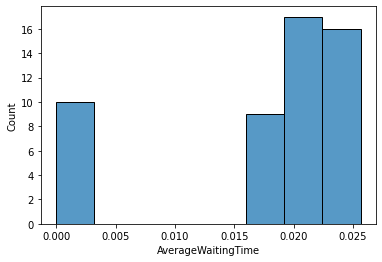

In [67]:
sns.histplot(data=predictordatedataframe, x="AverageWaitingTime")

In [9]:
predictordatedataframe.sort_values(by='AverageWaitingTime')

date  tokenproduced  tokenconsumed  tokenleft  \
190 2018-07-12            483            472      10629   
168 2018-06-20            745            434      10329   
169 2018-06-21            528            519      10338   
170 2018-06-22            525            550      10313   
171 2018-06-23              7            438       9882   
..         ...            ...            ...        ...   
367 2019-01-05              0              0       2921   
369 2019-01-07            171            406       2686   
371 2019-01-09            151            398       1960   
368 2019-01-06              0              0       2921   
379 2019-01-17              1            562          1   

                  WaitingTime  Count  WaitingDays  AverageWaitingTime  
190 0 days 00:00:00.000289207  11101            0            0.000000  
168 0 days 00:00:00.000253051  10763            0            0.000000  
169 0 days 00:00:00.000254636  10857            0            0.000000  
170 0 days 00:00:00.000252097  10863            0            0.000000  
171 0 days 00:00:00.000255481  10320            0            0.000000  
..                        ...    ...          ...                 ...  
367       85331 days 09:02:00   2921        85331           29.212941  
369       91024 days 15:23:00   3092        91024           29.438551  
371       70115 days 10:54:00   2358        70115           29.734945  
368       88252 days 09:02:00   2921        88252           30.212941  
379       22726 days 09:43:00    563        22726           40.365897  

[381 rows x 8 columns]

In [68]:
predictordatedataframe['rolledmean']=predictordatedataframe['tokenconsumed'].rolling(30,  min_periods=1, center=True, win_type='gaussian').mean(std=100)

index=predictordatedataframe.index.values
predictordatedataframe.insert( 0, column='index',value = index+1)

predictordatedataframe['totaltokenleft'] = predictordatedataframe['tokenleft'].cumsum()
def categorise(row):   
    if row['index']==0:
        return 0
    return row['totaltokenleft']/row['index']

predictordatedataframe['Averagetokenleft'] = predictordatedataframe.apply(lambda row: categorise(row), axis=1)
predictordatedataframe['totaltokenconsumed'] = predictordatedataframe['tokenconsumed'].cumsum()
def categorise(row):   
    if row['index']==0:
        return 0
    return row['totaltokenconsumed']/row['index']

predictordatedataframe['Averagetokenconsumed'] = predictordatedataframe.apply(lambda row: categorise(row), axis=1)
predictordatedataframe['totaltokenproduced'] = predictordatedataframe['tokenproduced'].cumsum()
def categorise(row):   
    if row['index']==0:
        return 0
    return row['totaltokenproduced']/row['index']

predictordatedataframe['Averagetokenproduced'] = predictordatedataframe.apply(lambda row: categorise(row), axis=1)

In [69]:
predictordatedataframe.sort_values(by='AverageWaitingTime')

index                                date  tokenproduced  tokenconsumed  \
0       1           2015-01-04 00:00:00+00:00              2              1   
8       9 2015-01-04 22:35:17.647058823+00:00              2              1   
7       8 2015-01-04 19:45:52.941176470+00:00              2              1   
6       7 2015-01-04 16:56:28.235294117+00:00              2              1   
5       6 2015-01-04 14:07:03.529411764+00:00              2              1   
51     52           2015-01-10 00:00:00+00:00             32             33   
3       4 2015-01-04 08:28:14.117647058+00:00              2              1   
2       3 2015-01-04 05:38:49.411764705+00:00              2              1   
1       2 2015-01-04 02:49:24.705882352+00:00              2              1   
4       5 2015-01-04 11:17:38.823529411+00:00              2              1   
42     43 2015-01-08 22:35:17.647058823+00:00             54             54   
41     42 2015-01-08 19:45:52.941176470+00:00             54             54   
40     41 2015-01-08 16:56:28.235294117+00:00             54             54   
39     40 2015-01-08 14:07:03.529411764+00:00             54             54   
38     39 2015-01-08 11:17:38.823529411+00:00             54             54   
37     38 2015-01-08 08:28:14.117647058+00:00             54             54   
36     37 2015-01-08 05:38:49.411764705+00:00             54             54   
35     36 2015-01-08 02:49:24.705882352+00:00             54             54   
34     35           2015-01-08 00:00:00+00:00             54             54   
24     25 2015-01-06 19:45:52.941176470+00:00             49             49   
23     24 2015-01-06 16:56:28.235294117+00:00             49             49   
22     23 2015-01-06 14:07:03.529411764+00:00             49             49   
25     26 2015-01-06 22:35:17.647058823+00:00             49             49   
20     21 2015-01-06 08:28:14.117647058+00:00             49             49   
19     20 2015-01-06 05:38:49.411764705+00:00             49             49   
21     22 2015-01-06 11:17:38.823529411+00:00             49             49   
17     18           2015-01-06 00:00:00+00:00             49             49   
18     19 2015-01-06 02:49:24.705882352+00:00             49             49   
33     34 2015-01-07 21:10:35.294117647+00:00             45             45   
32     33 2015-01-07 18:21:10.588235294+00:00             45             45   
31     32 2015-01-07 15:31:45.882352941+00:00             45             45   
28     29 2015-01-07 07:03:31.764705882+00:00             45             45   
29     30 2015-01-07 09:52:56.470588235+00:00             45             45   
27     28 2015-01-07 04:14:07.058823529+00:00             45             45   
26     27 2015-01-07 01:24:42.352941176+00:00             45             45   
30     31 2015-01-07 12:42:21.176470588+00:00             45             45   
9      10 2015-01-05 01:24:42.352941176+00:00             40             40   
11     12 2015-01-05 07:03:31.764705882+00:00             40             40   
12     13 2015-01-05 09:52:56.470588235+00:00             40             40   
10     11 2015-01-05 04:14:07.058823529+00:00             40             40   
15     16 2015-01-05 18:21:10.588235294+00:00             40             40   
16     17 2015-01-05 21:10:35.294117647+00:00             40             40   
13     14 2015-01-05 12:42:21.176470588+00:00             40             40   
14     15 2015-01-05 15:31:45.882352941+00:00             40             40   
50     51 2015-01-09 21:10:35.294117647+00:00             38             38   
43     44 2015-01-09 01:24:42.352941176+00:00             38             38   
44     45 2015-01-09 04:14:07.058823529+00:00             38             38   
45     46 2015-01-09 07:03:31.764705882+00:00             38             38   
46     47 2015-01-09 09:52:56.470588235+00:00             38             38   
47     48 2015-01-09 12:42:21.176470588+00:00         

# for sample log n6 (Response place)
Input
   (n100, 'Record Invoice Receipt')->n43
    
Output-
    n43->[(n104, 'Record Subsequent Invoice'), (n106, 'Clear Invoice'), (n102, 'Remove Payment Block')] 

In [13]:

input_transition_set=set()
input_transition_label_set=set()
output_transition_set=set()
output_transition_label_set=set()
for start in ['n45']:
    initial_start=get_initial_start(start)
    input_transition_set|=set(get_input_transitions(net,initial_start))
    input_transition_label_set|=get_labels_set(input_transition_set)
    output_transition_set|=set(get_output_transitions(net,initial_start))
    output_transition_label_set|=get_labels_set(output_transition_set)


print(input_transition_set)
print(input_transition_label_set)
print(output_transition_set)
print(output_transition_label_set)

token_produced=0
token_consumed=0
token_left=0
responsedf=pd.DataFrame(columns= ['StartEvent','StartTime','EndEvent','EndTime','User'])
for trace,case in zip(replayed_traces, log):
    last_event=None
    first_event=None
    if trace['trace_is_fit']==True:
        for active_trace in trace['activated_transitions']:
            if active_trace in input_transition_set :
                for events in case:
                    if events['concept:name'] in input_transition_label_set:
                        last_event=events
            if active_trace in output_transition_set:
                for events in case:
                    if events['concept:name'] in output_transition_label_set and first_event is None:
                        first_event=events
    if last_event is not None and first_event is not None:
        token_produced=token_produced+1
        token_consumed=token_consumed+1
        row_df = pd.DataFrame([[last_event['concept:name'], last_event['time:timestamp'],first_event['concept:name'], first_event['time:timestamp'], case.attributes['concept:name']]],columns= ['StartEvent','StartTime','EndEvent','EndTime','User'])
        responsedf = pd.concat([row_df, responsedf], ignore_index=True)
    
print(token_produced)
print(token_consumed)

responsedf

{(n102, 'Remove Payment Block'), (n100, 'Record Invoice Receipt'), (n104, 'Record Subsequent Invoice')}
{'Record Subsequent Invoice', 'Record Invoice Receipt', 'Remove Payment Block'}
{(n106, 'Clear Invoice')}
{'Clear Invoice'}
937
937


StartEvent                  StartTime       EndEvent  \
0    Record Invoice Receipt  2018-12-21 11:24:00+01:00  Clear Invoice   
1    Record Invoice Receipt  2018-12-21 09:34:00+01:00  Clear Invoice   
2    Record Invoice Receipt  2018-12-14 14:01:00+01:00  Clear Invoice   
3    Record Invoice Receipt  2018-12-07 11:37:00+01:00  Clear Invoice   
4    Record Invoice Receipt  2018-12-31 11:07:00+01:00  Clear Invoice   
..                      ...                        ...            ...   
932  Record Invoice Receipt  2018-02-06 11:53:00+01:00  Clear Invoice   
933  Record Invoice Receipt  2018-02-19 13:19:00+01:00  Clear Invoice   
934    Remove Payment Block  2018-01-18 17:25:00+01:00  Clear Invoice   
935  Record Invoice Receipt  2018-01-08 16:17:00+01:00  Clear Invoice   
936    Remove Payment Block  2018-03-08 15:58:00+01:00  Clear Invoice   

                       EndTime              User  
0    2019-01-15 12:01:00+01:00  4508075036_00030  
1    2019-01-15 12:01:00+01:00  4508075035_00010  
2    2019-01-06 23:59:00+01:00  4508072287_00040  
3    2019-01-02 23:59:00+01:00  4508071546_00190  
4    2019-01-10 15:45:00+01:00  4508070342_00030  
..                         ...               ...  
932  2018-03-29 15:09:00+02:00  4507000662_00010  
933  2018-04-26 11:13:00+02:00  4507000595_00020  
934  2018-03-29 15:10:00+02:00  4507000400_00030  
935  2018-03-29 15:07:00+02:00  4507000259_00030  
936  2018-03-15 14:13:00+01:00  4507000238_00250  

[937 rows x 5 columns]

In [14]:
responsedf['StartDateTime'] = pd.to_datetime(responsedf['StartTime'], utc=True)
responsedf['StartDate'] = pd.to_datetime(responsedf['StartDateTime']).dt.date
responsedf['EndDateTime'] = pd.to_datetime(responsedf['EndTime'], utc=True)
responsedf['EndDate'] = pd.to_datetime(responsedf['EndDateTime']).dt.date
responsedf['TotalWaitingTime']=  (pd.to_datetime(responsedf['EndTime'], utc=True)-pd.to_datetime(responsedf['StartTime'], utc=True))
minstartdate=min(responsedf['StartDateTime'])
maxenddate=max(responsedf['EndDateTime'])
responsedf


StartEvent                  StartTime       EndEvent  \
0    Record Invoice Receipt  2018-12-21 11:24:00+01:00  Clear Invoice   
1    Record Invoice Receipt  2018-12-21 09:34:00+01:00  Clear Invoice   
2    Record Invoice Receipt  2018-12-14 14:01:00+01:00  Clear Invoice   
3    Record Invoice Receipt  2018-12-07 11:37:00+01:00  Clear Invoice   
4    Record Invoice Receipt  2018-12-31 11:07:00+01:00  Clear Invoice   
..                      ...                        ...            ...   
932  Record Invoice Receipt  2018-02-06 11:53:00+01:00  Clear Invoice   
933  Record Invoice Receipt  2018-02-19 13:19:00+01:00  Clear Invoice   
934    Remove Payment Block  2018-01-18 17:25:00+01:00  Clear Invoice   
935  Record Invoice Receipt  2018-01-08 16:17:00+01:00  Clear Invoice   
936    Remove Payment Block  2018-03-08 15:58:00+01:00  Clear Invoice   

                       EndTime              User             StartDateTime  \
0    2019-01-15 12:01:00+01:00  4508075036_00030 2018-12-21 10:24:00+00:00   
1    2019-01-15 12:01:00+01:00  4508075035_00010 2018-12-21 08:34:00+00:00   
2    2019-01-06 23:59:00+01:00  4508072287_00040 2018-12-14 13:01:00+00:00   
3    2019-01-02 23:59:00+01:00  4508071546_00190 2018-12-07 10:37:00+00:00   
4    2019-01-10 15:45:00+01:00  4508070342_00030 2018-12-31 10:07:00+00:00   
..                         ...               ...                       ...   
932  2018-03-29 15:09:00+02:00  4507000662_00010 2018-02-06 10:53:00+00:00   
933  2018-04-26 11:13:00+02:00  4507000595_00020 2018-02-19 12:19:00+00:00   
934  2018-03-29 15:10:00+02:00  4507000400_00030 2018-01-18 16:25:00+00:00   
935  2018-03-29 15:07:00+02:00  4507000259_00030 2018-01-08 15:17:00+00:00   
936  2018-03-15 14:13:00+01:00  4507000238_00250 2018-03-08 14:58:00+00:00   

      StartDate               EndDateTime     EndDate TotalWaitingTime  
0    2018-12-21 2019-01-15 11:01:00+00:00  2019-01-15 25 days 00:37:00  
1    2018-12-21 2019-01-15 11:01:00+00:00  2019-01-15 25 days 02:27:00  
2    2018-12-14 2019-01-06 22:59:00+00:00  2019-01-06 23 days 09:58:00  
3    2018-12-07 2019-01-02 22:59:00+00:00  2019-01-02 26 days 12:22:00  
4    2018-12-31 2019-01-10 14:45:00+00:00  2019-01-10 10 days 04:38:00  
..          ...                       ...         ...              ...  
932  2018-02-06 2018-03-29 13:09:00+00:00  2018-03-29 51 days 02:16:00  
933  2018-02-19 2018-04-26 09:13:00+00:00  2018-04-26 65 days 20:54:00  
934  2018-01-18 2018-03-29 13:10:00+00:00  2018-03-29 69 days 20:45:00  
935  2018-01-08 2018-03-29 13:07:00+00:00  2018-03-29 79 days 21:50:00  
936  2018-03-08 2018-03-15 13:13:00+00:00  2018-03-15  6 days 22:15:00  

[937 rows x 10 columns]

In [33]:
periodfreq=len(responsedf)/5
responsedatedataframe = pd.DataFrame({'date':pd.date_range(start=minstartdate, end=maxenddate, periods=periodfreq),'tokenproduced':0,'tokenconsumed':0,'tokenleft':0,'WaitingTime':0,'Count':0,'consumedByUserList':'0'})
timeperiodsec=(responsedatedataframe.iloc[1]['date']-responsedatedataframe.iloc[0]['date']).seconds
timeperiodday=(responsedatedataframe.iloc[1]['date']-responsedatedataframe.iloc[0]['date']).days
print(timeperiod)
print(timeperiodday)
responsedatedataframe

897
2


date  tokenproduced  tokenconsumed  \
0             2018-01-08 15:17:00+00:00              0              0   
1   2018-01-10 15:31:57.741935483+00:00              0              0   
2   2018-01-12 15:46:55.483870967+00:00              0              0   
3   2018-01-14 16:01:53.225806451+00:00              0              0   
4   2018-01-16 16:16:50.967741935+00:00              0              0   
..                                  ...            ...            ...   
182 2019-01-09 12:40:09.032258064+00:00              0              0   
183 2019-01-11 12:55:06.774193548+00:00              0              0   
184 2019-01-13 13:10:04.516129032+00:00              0              0   
185 2019-01-15 13:25:02.258064516+00:00              0              0   
186           2019-01-17 13:40:00+00:00              0              0   

     tokenleft  WaitingTime  Count consumedByUserList  
0            0            0      0                  0  
1            0            0      0                  0  
2            0            0      0                  0  
3            0            0      0                  0  
4            0            0      0                  0  
..         ...          ...    ...                ...  
182          0            0      0                  0  
183          0            0      0                  0  
184          0            0      0                  0  
185          0            0      0                  0  
186          0            0      0                  0  

[187 rows x 7 columns]

In [96]:
#responsedf.to_csv (r'C:\Users\bittu\RWTH\Thesis\bpi2019responsedf.csv', index = False, header=True)
responsedf = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2019responsedf.csv')
responsedf['StartDate']=pd.to_datetime(responsedf['StartDate'])
responsedf['EndDate']=pd.to_datetime(responsedf['EndDate'])
responsedf['StartDateTime']=pd.to_timedelta(responsedf['StartDateTime'])

In [120]:
responsedf['StartDateTime']=pd.to_datetime(responsedf['StartDateTime'])
responsedf['EndDateTime']=pd.to_datetime(responsedf['EndDateTime'])

In [56]:
pd.set_option('display.max_rows', None)

responsedf.sort_values(by='EndDateTime')

StartEvent                  StartTime       EndEvent  \
919  Record Invoice Receipt  2018-01-11 12:33:00+01:00  Clear Invoice   
928  Record Invoice Receipt  2018-01-09 15:56:00+01:00  Clear Invoice   
872  Record Invoice Receipt  2018-01-31 10:54:00+01:00  Clear Invoice   
845  Record Invoice Receipt  2018-02-05 12:33:00+01:00  Clear Invoice   
856  Record Invoice Receipt  2018-02-01 16:45:00+01:00  Clear Invoice   
911  Record Invoice Receipt  2018-02-02 12:26:00+01:00  Clear Invoice   
912  Record Invoice Receipt  2018-01-16 14:13:00+01:00  Clear Invoice   
896  Record Invoice Receipt  2018-01-18 16:08:00+01:00  Clear Invoice   
850    Remove Payment Block  2018-02-12 16:25:00+01:00  Clear Invoice   
868  Record Invoice Receipt  2018-01-30 15:45:00+01:00  Clear Invoice   
905  Record Invoice Receipt  2018-02-01 12:48:00+01:00  Clear Invoice   
847  Record Invoice Receipt  2018-02-01 17:00:00+01:00  Clear Invoice   
881  Record Invoice Receipt  2018-02-07 17:14:00+01:00  Clear Invoice   
900    Remove Payment Block  2018-02-07 18:13:00+01:00  Clear Invoice   
897    Remove Payment Block  2018-02-22 16:54:00+01:00  Clear Invoice   
929  Record Invoice Receipt  2018-01-10 10:24:00+01:00  Clear Invoice   
931  Record Invoice Receipt  2018-02-12 09:55:00+01:00  Clear Invoice   
915  Record Invoice Receipt  2018-01-22 10:09:00+01:00  Clear Invoice   
926    Remove Payment Block  2018-02-21 13:15:00+01:00  Clear Invoice   
903  Record Invoice Receipt  2018-02-05 17:42:00+01:00  Clear Invoice   
914  Record Invoice Receipt  2018-01-22 10:09:00+01:00  Clear Invoice   
898    Remove Payment Block  2018-02-07 16:30:00+01:00  Clear Invoice   
870  Record Invoice Receipt  2018-02-10 10:06:00+01:00  Clear Invoice   
924  Record Invoice Receipt  2018-02-12 16:53:00+01:00  Clear Invoice   
862  Record Invoice Receipt  2018-02-13 17:54:00+01:00  Clear Invoice   
796  Record Invoice Receipt  2018-02-20 14:20:00+01:00  Clear Invoice   
925  Record Invoice Receipt  2018-01-11 14:54:00+01:00  Clear Invoice   
781  Record Invoice Receipt  2018-02-22 14:15:00+01:00  Clear Invoice   
773  Record Invoice Receipt  2018-02-21 10:48:00+01:00  Clear Invoice   
799  Record Invoice Receipt  2018-02-28 12:40:00+01:00  Clear Invoice   
936    Remove Payment Block  2018-03-08 15:58:00+01:00  Clear Invoice   
740  Record Invoice Receipt  2018-03-06 13:41:00+01:00  Clear Invoice   
752  Record Invoice Receipt  2018-03-06 16:54:00+01:00  Clear Invoice   
855  Record Invoice Receipt  2018-02-28 10:34:00+01:00  Clear Invoice   
877  Record Invoice Receipt  2018-01-30 14:43:00+01:00  Clear Invoice   
907  Record Invoice Receipt  2018-01-24 15:21:00+01:00  Clear Invoice   
758  Record Invoice Receipt  2018-03-07 15:55:00+01:00  Clear Invoice   
887  Record Invoice Receipt  2018-03-12 14:31:00+01:00  Clear Invoice   
835  Record Invoice Receipt  2018-03-05 15:57:00+01:00  Clear Invoice   
857  Record Invoice Receipt  2018-02-14 11:26:00+01:00  Clear Invoice   
759  Record Invoice Receipt  2018-03-07 15:55:00+01:00  Clear Invoice   
901    Remove Payment Block  2018-02-22 17:39:00+01:00  Clear Invoice   
859  Record Invoice Receipt  2018-02-07 10:04:00+01:00  Clear Invoice   
853    Remove Payment Block  2018-02-14 17:05:00+01:00  Clear Invoice   
791  Record Invoice Receipt  2018-03-07 17:50:00+01:00  Clear Invoice   
803  Record Invoice Receipt  2018-03-06 17:33:00+01:00  Clear Invoice   
854  Record Invoice Receipt  2018-02-22 16:19:00+01:00  Clear Invoice   
913  Record Invoice Receipt  2018-02-10 06:41:00+01:00  Clear Invoice   
784  Record Invoice Receipt  2018-03-07 14:23:00+01:00  Clear Invoice   
935  Record Invoice Receipt  2018-01-08 16:17:00+01:00  Clear Invoice   
892  Record Invoice Receipt  2018-02-13 15:27:00+01:00  Clear Invoice   
849  Record Invoice Receipt  2018-02-21 12:39:00+01:00  Clear Invoice   
873  Record Invoice Receipt  2018-02-21 10:57:00+01:00  Clear Invoice   
874  Record Invoice Receipt  2018-02-21 10:49:00+01:00  Clear Invoice   
77

In [35]:
from datetime import date
for index, row in responsedatedataframe.iterrows():
    currentdate=row['date']
    produced=0
    left=0
    consumed=0
    waiting=pd.Timedelta(days=0)
    count=0
    waitingdays=0
    consumedByUserList=[]
    for indexdata, rowdata in responsedf.iterrows():
        StartDate=rowdata['StartDateTime']
        EndDate=rowdata['EndDateTime']
        User=rowdata['User']
        #TotalWaitingTime=rowdata['TotalWaitingTime']
        TotalWaitingTime=rowdata['TotalWaitingTime']
        #WaitingTimeTillDate=currentdate+pd.to_timedelta(timeperiod, unit='s')
        if currentdate>=StartDate and currentdate-pd.to_timedelta(timeperiodday, unit='D')-pd.to_timedelta(timeperiodsec, unit='s')<StartDate:
            produced=produced+1
        if currentdate>=EndDate and currentdate-pd.to_timedelta(timeperiodday, unit='D')-pd.to_timedelta(timeperiodsec, unit='s')<EndDate:
            consumedByUserList.append(User)
            consumed=consumed+1
            WaitingTimeTillDate=rowdata['EndDateTime']
        if currentdate<EndDate and currentdate>=StartDate:
            left=left+1
        if currentdate<EndDate and currentdate>=StartDate:
            TotalWaitingTime=currentdate.replace(tzinfo=None)-StartDate.replace(tzinfo=None)
            if waiting is None:
                waiting=TotalWaitingTime
            else:
                if waiting.days<100000:
                    waiting=waiting+TotalWaitingTime
                    waitingdays=waiting.days
                else :
                    waitingdays=TotalWaitingTime.days+waitingdays
            count=count+1
    responsedatedataframe.at[index, 'tokenproduced']=produced
    responsedatedataframe.at[index, 'tokenconsumed']=consumed
    responsedatedataframe.at[index, 'tokenleft']=left
    responsedatedataframe.at[index, 'WaitingTime']=waiting
    responsedatedataframe.at[index, 'consumedByUserList']=consumedByUserList
    if waiting.days<100000:
        responsedatedataframe.at[index, 'WaitingTime']=waiting
    else:
        responsedatedataframe.at[index, 'WaitingTime']=waitingdays
    responsedatedataframe.at[index, 'Count']=count

In [57]:

responsedatedataframe[responsedatedataframe['tokenconsumed']>0].sort_values(by='date')


date  tokenproduced  tokenconsumed  \
12  2018-02-01 18:16:32.903225806+00:00              7              2   
19  2018-02-15 20:01:17.096774193+00:00              5              1   
21  2018-02-19 20:31:12.580645161+00:00              1              1   
23  2018-02-23 21:01:08.064516129+00:00              9             10   
26  2018-03-01 21:46:01.290322581+00:00              5              2   
30  2018-03-09 22:45:52.258064516+00:00              6             12   
32  2018-03-13 23:15:47.741935484+00:00              8              2   
33  2018-03-15 23:30:45.483870968+00:00             15              1   
37  2018-03-24 00:30:36.451612903+00:00             18              4   
40  2018-03-30 01:15:29.677419355+00:00              4             35   
44  2018-04-07 02:15:20.645161290+00:00              4             26   
47  2018-04-13 03:00:13.870967742+00:00              8              5   
51  2018-04-21 04:00:04.838709678+00:00             10              4   
54  2018-04-27 04:44:58.064516130+00:00              9             51   
58  2018-05-05 05:44:49.032258064+00:00              5              3   
61  2018-05-11 06:29:42.258064516+00:00             10             36   
64  2018-05-17 07:14:35.483870968+00:00              4              2   
65  2018-05-19 07:29:33.225806452+00:00             11              5   
68  2018-05-25 08:14:26.451612904+00:00             10             53   
72  2018-06-02 09:14:17.419354840+00:00              6              8   
75  2018-06-08 09:59:10.645161290+00:00              6             38   
77  2018-06-12 10:29:06.129032258+00:00             10              2   
79  2018-06-16 10:59:01.612903226+00:00              5              3   
82  2018-06-22 11:43:54.838709678+00:00              3              3   
85  2018-06-28 12:28:48.064516130+00:00              5             42   
86  2018-06-30 12:43:45.806451614+00:00              7              1   
89  2018-07-06 13:28:39.032258064+00:00             11             35   
91  2018-07-10 13:58:34.516129032+00:00              5              2   
92  2018-07-12 14:13:32.258064516+00:00             10              2   
96  2018-07-20 15:13:23.225806452+00:00              3              9   
100 2018-07-28 16:13:14.193548388+00:00              3             48   
103 2018-08-03 16:58:07.419354840+00:00              5              6   
106 2018-08-09 17:43:00.645161292+00:00              5             24   
109 2018-08-15 18:27:53.870967744+00:00              5              2   
110 2018-08-17 18:42:51.612903228+00:00              7              7   
113 2018-08-23 19:27:44.838709676+00:00              8              6   
117 2018-08-31 20:27:35.806451612+00:00              7             44   
120 2018-09-06 21:12:29.032258064+00:00             15             31   
123 2018-09-12 21:57:22.258064516+00:00             12              1   
124           2018-09-14 22:12:20+00:00             11              7   
127 2018-09-20 22:57:13.225806452+00:00              9              4   
131 2018-09-28 23:57:04.193548388+00:00              7             40   
134 2018-10-05 00:41:57.419354840+00:00             10             34   
135 2018-10-07 00:56:55.161290324+00:00              7              1   
138 2018-10-13 01:41:48.387096776+00:00              5              5   
140 2018-10-17 02:11:43.870967744+00:00              9              1   
141 2018-10-19 02:26:41.612903228+00:00              5              5   
145 2018-10-27 03:26:32.580645160+00:00              5             45   
148 2018-11-02 04:11:25.806451612+00:00              8              8   
152 2018-11-10 05:11:16.774193548+00:00              1             31   
155           2018-11-16 05:56:10+00:00             11              4   
159 2018-11-24 06:56:00.967741936+00:00              7              9   
162 2018-11-30 07:40:54.193548388+00:00              4             34   
166 2018-12-08 08:40:45.161290324+00:00              9             42   
168 2018-12-12 09:10

for index, row in datedataframe.iterrows():
    date=row['date']
    print(typedate.date())
    break
for indexdata, rowdata in df.iterrows():
    StartDate=rowdata['StartDate']
    break
from datetime import date 
datenew=date(2001, 1, 1)
print(type(StartDate))

datedataframe.sort_values(by='WaitingTime')
#datedataframe['WaitingTime']=datedataframe['WaitingTime'].fillna((pd.Timedelta(days=0)))

In [132]:
#save a file to not having to run the experiment above again
responsedatedataframe.to_csv (r'C:\Users\bittu\RWTH\Thesis\bpi2019datasetresponseresponsedatedataframewithuser.csv', index = False, header=True)


In [ ]:
#read from a saved file
targetdatedataframe = presponsedatedataframed.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2019datasetresponseresponsedatedataframe.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date'])
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [38]:
targetdatedataframe=responsedatedataframe

In [79]:
targetdatedataframe['rolledmean']=targetdatedataframe['tokenconsumed'].rolling(30,  min_periods=1, win_type='gaussian').mean(std=100)


def categorise(row):   
    if row['rolledmean']/max(row['tokenconsumed'],1) < 0.3 and row['tokenconsumed']>0 :
        return 1
    return 0

targetdatedataframe['batched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)

In [74]:
def categorise(row):   
    return len(set(row['consumedByUserList']))

targetdatedataframe['DistinctUserCount'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)

def categorise(row):   
    return len(row['consumedByUserList'])

targetdatedataframe['UserCount'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
from statistics import mode
def categorise(row):
    if len(row['consumedByUserList'])<1:
        return 0
    return mode(row['consumedByUserList'])

targetdatedataframe['MostUtilisedUser'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)

StatisticsError: no unique mode; found 2 equally common values

In [72]:
targetdatedataframe.iloc[0]

date                  2018-01-08 15:17:00+00:00
tokenproduced                                 1
tokenconsumed                                 0
tokenleft                                     1
WaitingTime                     0 days 00:00:00
Count                                         1
consumedByUserList                    [a, b, a]
chunkmean                                 0.875
chunkindex                                    1
chunkbatched                                  0
DistinctUserCount                             2
UserCount                                     3
Name: 0, dtype: object

Prophet

In [80]:
targetdatedataframe.sort_values(by='date')
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet

m = Prophet(changepoint_range=1,changepoint_prior_scale=0.05)
forecast=m.fit(targetdatedataframe[['date','tokenconsumed']].rename({'date': 'ds','tokenconsumed':'y'}, axis=1))
#future = m.make_future_dataframe(periods=366)
#forecast = m.predict(future)
sns.lineplot(data=targetdatedataframe, x="date", y="tokenconsumed")
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

Importing plotly failed. Interactive plots will not work.


ValueError: Column ds has timezone specified, which is not supported. Remove timezone.

Ruptures Gaussian Kernel-https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/

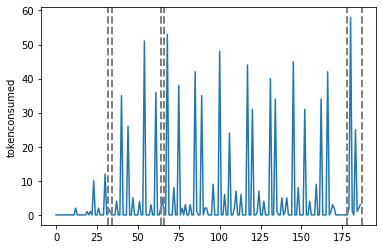

In [39]:
import ruptures as rpt
algo_python = rpt.Pelt(model="rbf", jump=2, min_size=1).fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

penalty_value = 1  # beta
result = algo_python.predict(pen=penalty_value)
result
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

Rupture linear kernel- https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/

[40, 90, 100, 168, 187]


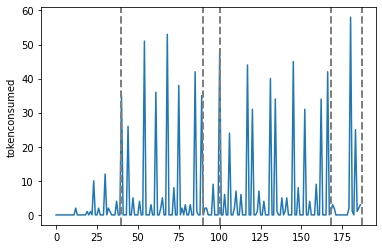

In [42]:
algo_python = rpt.Pelt(model="l2", jump=2, min_size=10).fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python


penalty_value = 100 # beta

result = algo_python.predict(pen=penalty_value)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


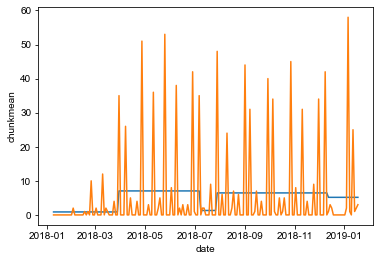

In [43]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [54]:
def categorise(row):   
    if row['chunkmean']*1.5 < row['tokenconsumed'] :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)

In [55]:
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')

29


date  tokenproduced  tokenconsumed  \
12  2018-02-01 18:16:32.903225806+00:00              7              2   
23  2018-02-23 21:01:08.064516129+00:00              9             10   
26  2018-03-01 21:46:01.290322581+00:00              5              2   
30  2018-03-09 22:45:52.258064516+00:00              6             12   
32  2018-03-13 23:15:47.741935484+00:00              8              2   
37  2018-03-24 00:30:36.451612903+00:00             18              4   
40  2018-03-30 01:15:29.677419355+00:00              4             35   
44  2018-04-07 02:15:20.645161290+00:00              4             26   
54  2018-04-27 04:44:58.064516130+00:00              9             51   
61  2018-05-11 06:29:42.258064516+00:00             10             36   
68  2018-05-25 08:14:26.451612904+00:00             10             53   
75  2018-06-08 09:59:10.645161290+00:00              6             38   
85  2018-06-28 12:28:48.064516130+00:00              5             42   
89  2018-07-06 13:28:39.032258064+00:00             11             35   
91  2018-07-10 13:58:34.516129032+00:00              5              2   
92  2018-07-12 14:13:32.258064516+00:00             10              2   
96  2018-07-20 15:13:23.225806452+00:00              3              9   
100 2018-07-28 16:13:14.193548388+00:00              3             48   
106 2018-08-09 17:43:00.645161292+00:00              5             24   
117 2018-08-31 20:27:35.806451612+00:00              7             44   
120 2018-09-06 21:12:29.032258064+00:00             15             31   
131 2018-09-28 23:57:04.193548388+00:00              7             40   
134 2018-10-05 00:41:57.419354840+00:00             10             34   
145 2018-10-27 03:26:32.580645160+00:00              5             45   
152 2018-11-10 05:11:16.774193548+00:00              1             31   
162 2018-11-30 07:40:54.193548388+00:00              4             34   
166 2018-12-08 08:40:45.161290324+00:00              9             42   
180 2019-01-05 12:10:13.548387096+00:00              0             58   
183 2019-01-11 12:55:06.774193548+00:00              2             25   

     tokenleft                   WaitingTime  Count  \
12          24   222 days 22:22:09.677419344     24   
23          70   970 days 23:32:24.516129030     70   
26          84  1380 days 18:04:48.387096804     84   
30          91  1734 days 13:24:15.483870956     91   
32         108  2113 days 13:10:56.129032272    108   
37         154  3310 days 15:49:33.548387062    154   
40         131  2942 days 10:32:47.741935505    131   
44         122  3141 days 01:54:58.709677380    122   
54         124  3565 days 18:16:00.000000120    124   
61         119  3894 days 09:43:48.709677404    119   
68         103  2921 days 14:54:24.516129112    103   
75          96  2997 days 00:53:01.935483840     96   
85         100     3131 days 08:07:06.451613    100   
89          92  2460 days 15:50:50.967741888     92   
91         101  2827 days 06:01:06.129032232    101   
92         109  2996 days 18:34:36.129032244    109   
96         124  3794 days 08:56:00.000000048    124   
100        105  2933 days 13:59:50.322580740    105   
106        114  3223 days 04:30:13.548387288    114   
117        104  3468 days 05:32:03.870967648    104   
120         92  2643 days 13:01:30.967741888     92   
131        118  3484 days 03:40:14.838709784    118   
134         99  2787 days 17:21:44.516129160     99   
145         90  2918 days 16:21:52.258064400     90   
152         69  2687 days 23:07:17.419354812     69   
162         77  2422 days 16:11:32.903225876     77   
166         62  1493 days 18:36:40.000000088     62   
180         27   723 days 19:23:05.806451592     27   
183          6   117 days 09:29:40.645161288      6   

                                    consumedByUserList  chunkmean  chunkindex  \
12                [4507001585_00010, 4507001128_00030]   0.875000           1   
23   [4507006556_00010, 4507006

# Creating the combined dataframe

In [76]:
originalpredictordatedataframe=predictordatedataframe


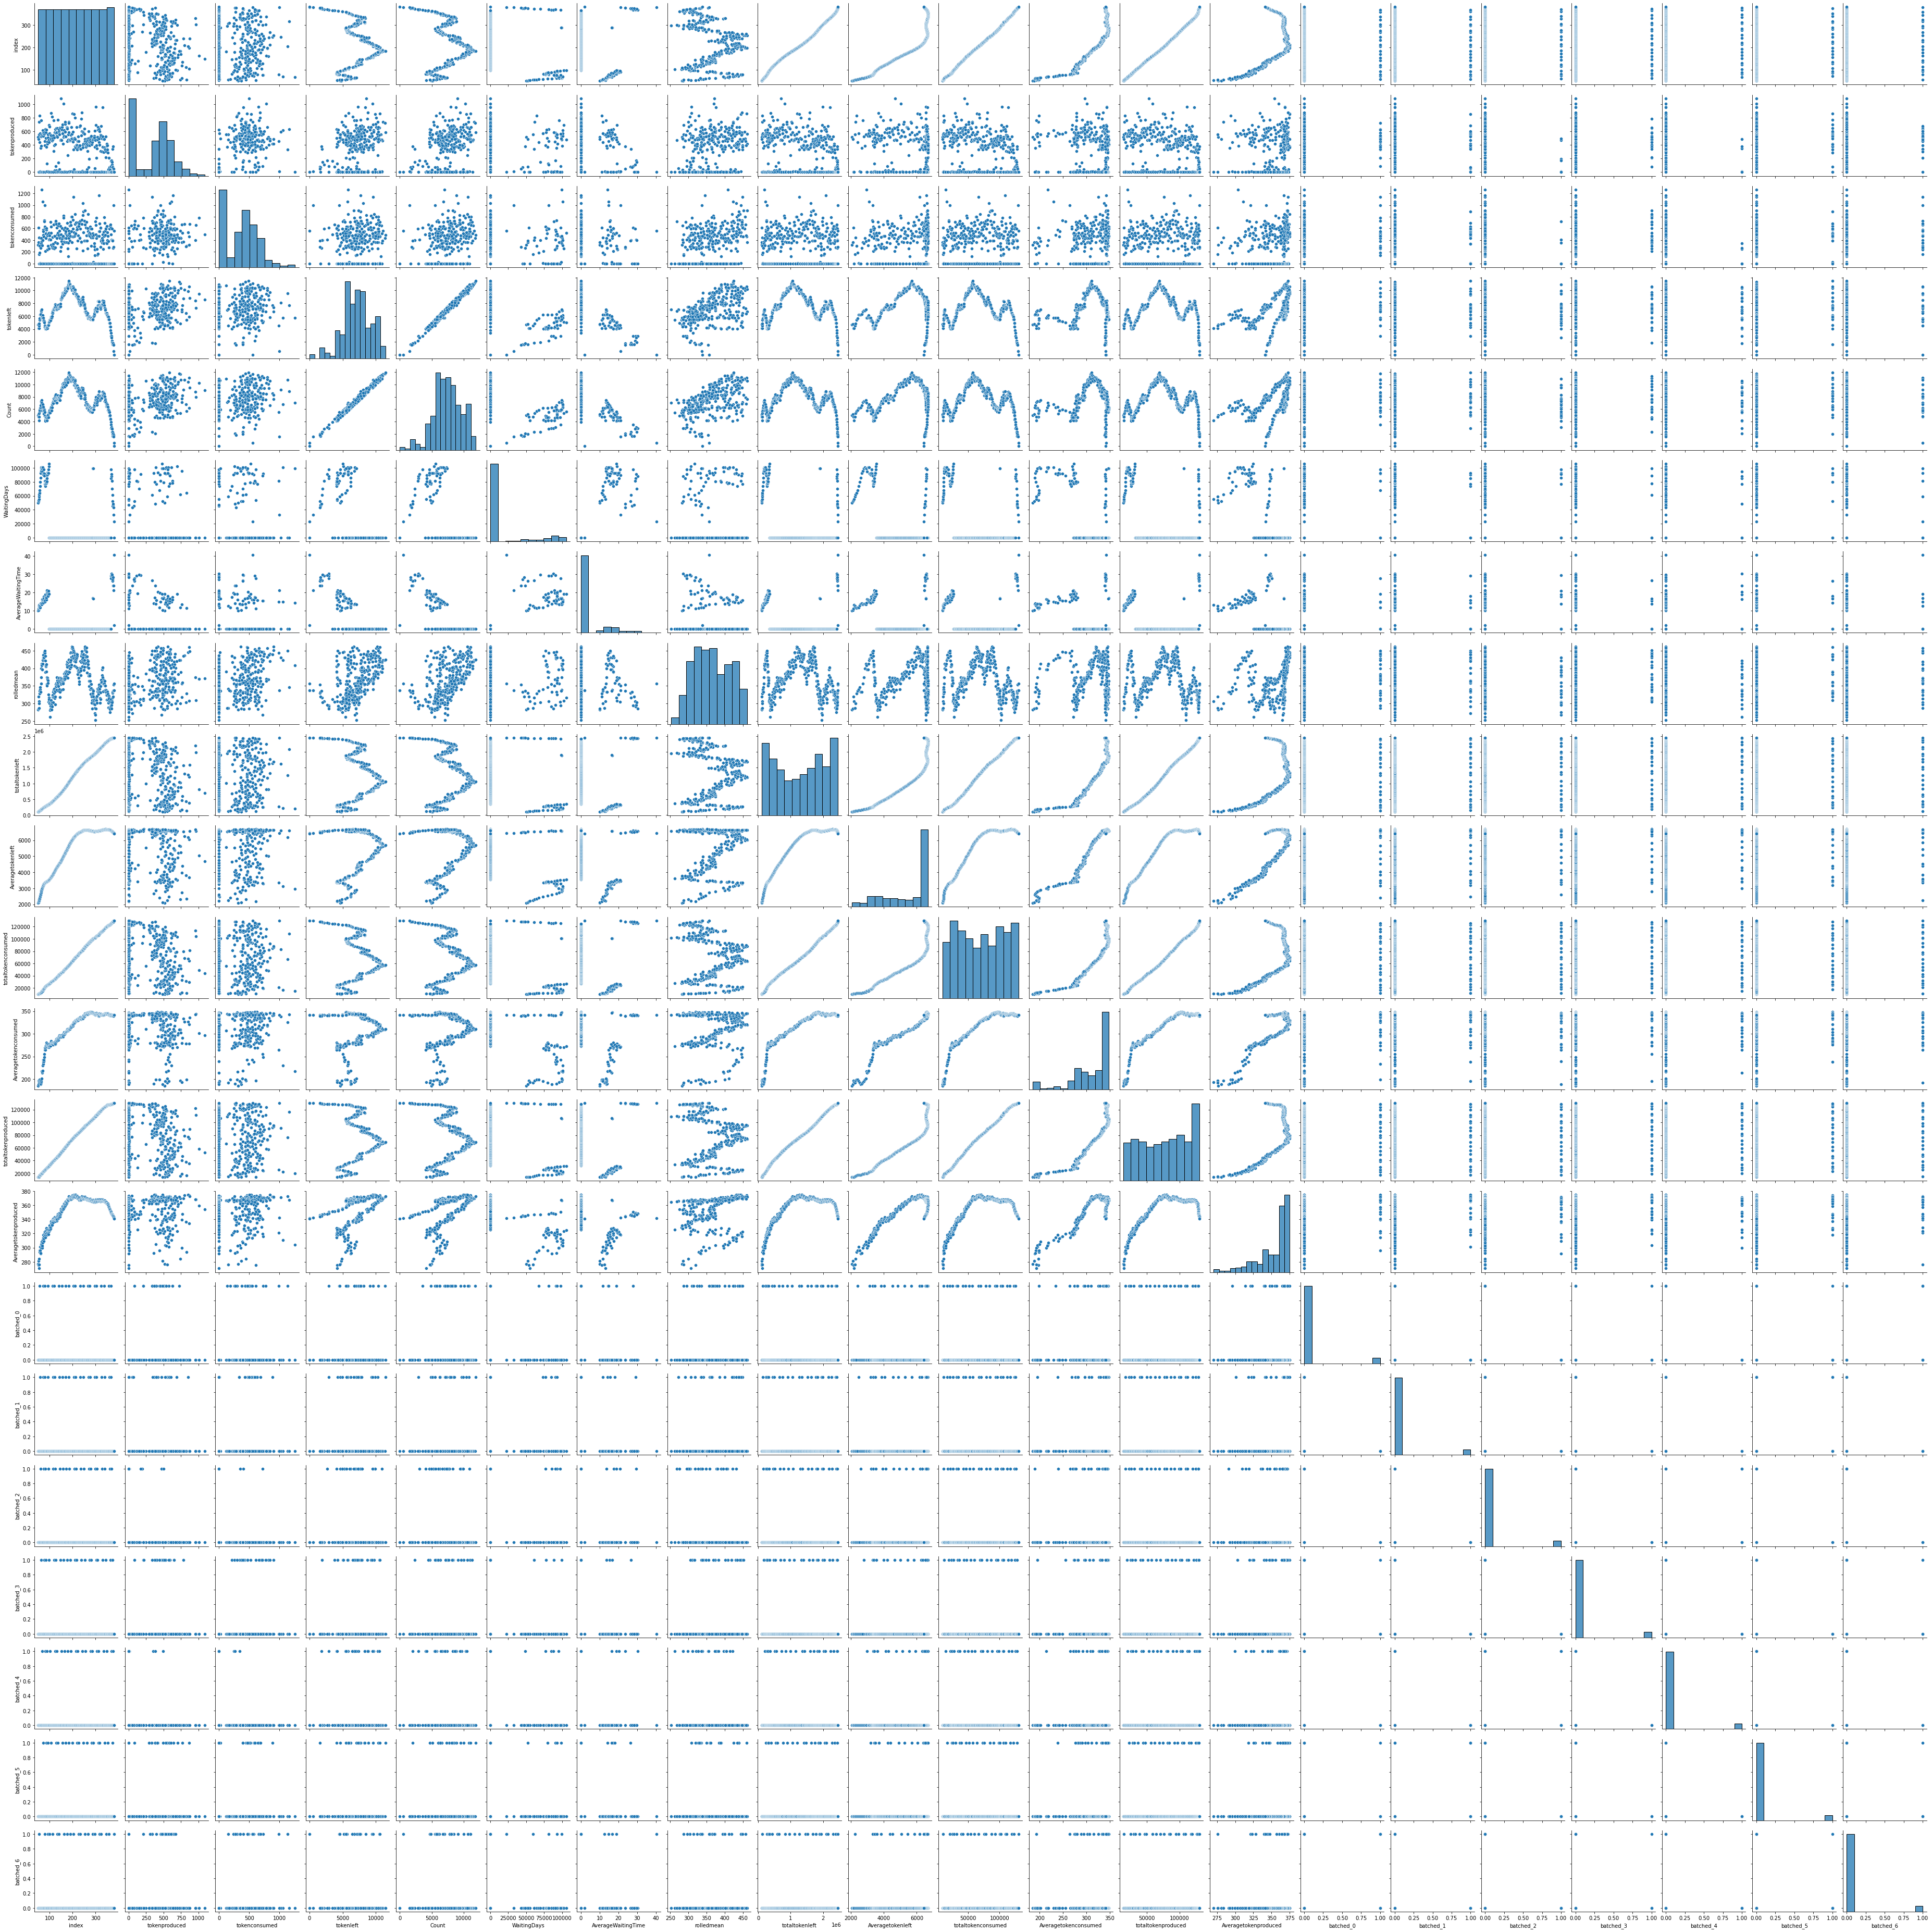

In [47]:
sns.pairplot(predictordatedataframe)

In [77]:
import datetime
#add seven days
def categorise(row,numdays):   
    return row['date'] +  datetime.timedelta(days=numdays)
for i in range (7):
    targetdatedataframe['date'] = targetdatedataframe.apply(lambda row: categorise(row,i), axis=1)
    predictordatedataframe=predictordatedataframe.merge(targetdatedataframe[['date','chunkbatched']].rename({'chunkbatched': 'batched_'+str(i)}, axis=1), on='date', how='left')

In [78]:
predictordatedataframe=predictordatedataframe.dropna()
predictordatedataframe.count()

index                   359
date                    359
tokenproduced           359
tokenconsumed           359
tokenleft               359
WaitingTime             359
Count                   359
WaitingDays             359
AverageWaitingTime      359
rolledmean              359
totaltokenleft          359
Averagetokenleft        359
totaltokenconsumed      359
Averagetokenconsumed    359
totaltokenproduced      359
Averagetokenproduced    359
batched_0               359
batched_1               359
batched_2               359
batched_3               359
batched_4               359
batched_5               359
batched_6               359
dtype: int64

In [17]:
predictordatedataframe

index       date  tokenproduced  tokenconsumed  tokenleft  \
22      23 2018-01-25            349            257       1560   
23      24 2018-01-26            377            195       1742   
24      25 2018-01-27             23              0       1765   
25      26 2018-01-28              1              0       1766   
26      27 2018-01-29            524            102       2188   
..     ...        ...            ...            ...        ...   
376    377 2019-01-14            380            269       1775   
377    378 2019-01-15             52            283       1544   
378    379 2019-01-16             15            997        562   
379    380 2019-01-17              1            562          1   
380    381 2019-01-18              0              1          0   

            WaitingTime  Count  WaitingDays  AverageWaitingTime  rolledmean  \
22   7807 days 14:41:00   1817         7807            4.296643  160.747230   
23   9070 days 12:17:00   1937         9070            4.682499  170.942227   
24  10190 days 18:43:00   1765        10190            5.773371  195.815997   
25  11955 days 19:44:00   1766        11955            6.769536  189.801101   
26  13858 days 17:54:00   2290        13858            6.051528  195.951249   
..                  ...    ...          ...                 ...         ...   
376 48542 days 02:13:00   2044        48542           23.748532  335.928953   
377 43162 days 07:34:00   1827        43162           23.624521  353.457080   
378 32944 days 20:23:00   1559        32944           21.131495  337.336241   
379 22726 days 09:43:00    563        22726           40.365897  357.011072   
380     2 days 21:27:00      1            2            2.000000  337.971683   

     ...  Averagetokenconsumed  totaltokenproduced  Averagetokenproduced  \
22   ...            105.782609                3993            173.608696   
23   ...            109.500000                4370            182.083333   
24   ...            105.120000                4393            175.720000   
25   ...            101.076923                4394            169.000000   
26   ...            101.111111                4918            182.148148   
..   ...                   ...                 ...                   ...   
376  ...            339.710875              129846            344.419098   
377  ...            339.560847              129898            343.645503   
378  ...            341.295515              129913            342.778364   
379  ...            341.876316              129914            341.878947   
380  ...            340.981627              129914            340.981627   

     batched_0  batched_1  batched_2  batched_3  batched_4  batched_5  \
22         1.0        1.0        0.0        0.0        0.0        0.0   
23         0.0        1.0        0.0        0.0        0.0        0.0   
24         0.0        0.0        1.0        0.0        0.0        0.0   
25         0.0        0.0        1.0        0.0        1.0        0.0   
26         1.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
376        0.0        0.0        0.0        0.0        1.0        0.0   
377        0.0        0.0        0.0        0.0        0.0        0.0   
378        0.0        0.0        0.0        1.0        0.0        0.0   
379        0.0        0.0        0.0        0.0        0.0        0.0   
380        0.0        0.0        0.0        0.0        0.0        0.0   

     batched_6  
22         0.0  
23         0.0  
24         0.0  
25         0.0  
26         1.0  
..         ...  
376        0.0  
377        0.0  
378        0.0  
379        0.0  
380        0.0  

[359 rows x 23 columns]

In [79]:
predictordatedataframe=predictordatedataframe.merge(targetdatedataframe[['date','tokenproduced', 'tokenconsumed', 'tokenleft','chunkmean', 'Count',
       'rolledmean']], on='date', how='left')

265    0.0
165    0.0
241    0.0
74     0.0
331    0.0
      ... 
73     0.0
93     1.0
325    0.0
24     0.0
252    1.0
Name: batched_0, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.8611111111111112
Mean Squared error LR- 0.927960727138337
Accuracy: 0.1388888888888889
F1: 0.12622879512831667
Precision: 0.3160377358490566
Recall: 0.4720430107526882


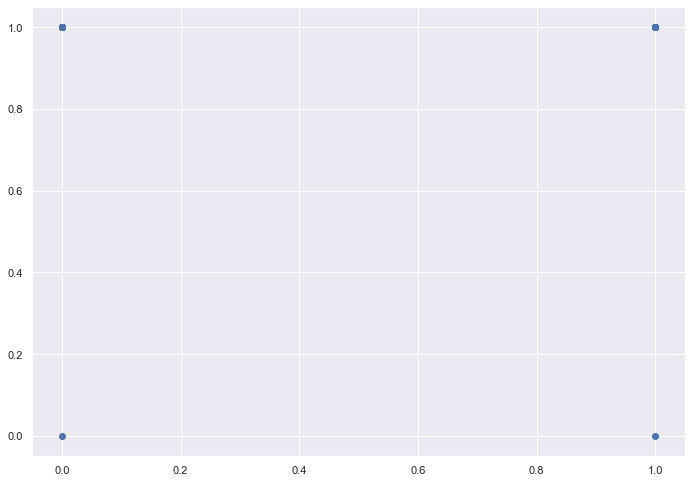

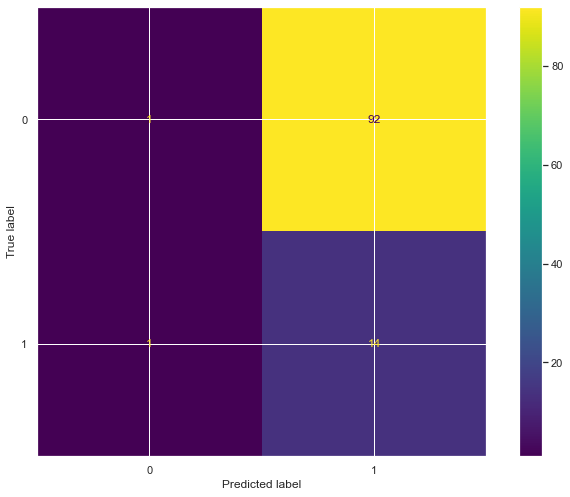

351    1.0
353    0.0
62     0.0
208    0.0
113    0.0
      ... 
198    0.0
88     0.0
313    0.0
36     1.0
317    1.0
Name: batched_1, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.8240740740740741
Mean Squared error LR- 0.9077852576871218
Accuracy: 0.17592592592592593
F1: 0.1496062992125984
Precision: 0.08796296296296297
Recall: 0.5


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


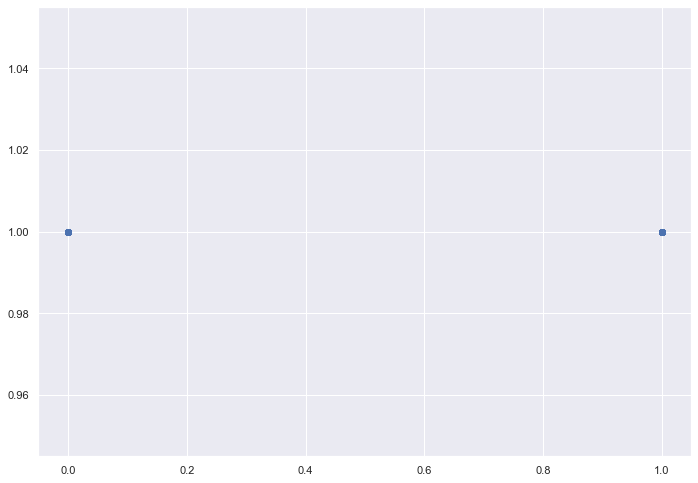

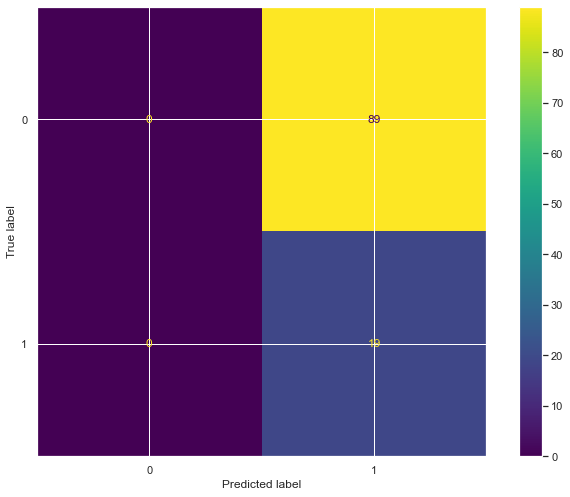

176    0.0
100    0.0
350    0.0
50     0.0
147    0.0
      ... 
278    0.0
292    0.0
342    0.0
337    0.0
253    0.0
Name: batched_2, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.9166666666666666
Mean Squared error LR- 0.9574271077563381
Accuracy: 0.08333333333333333
F1: 0.07946620749031424
Precision: 0.28773584905660377
Recall: 0.44949494949494945


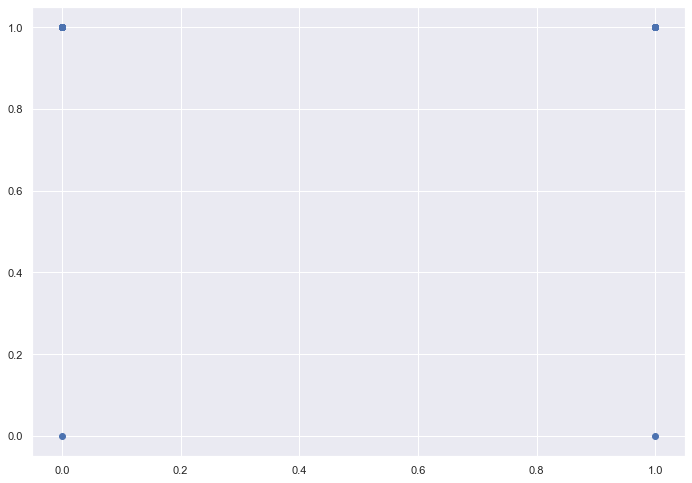

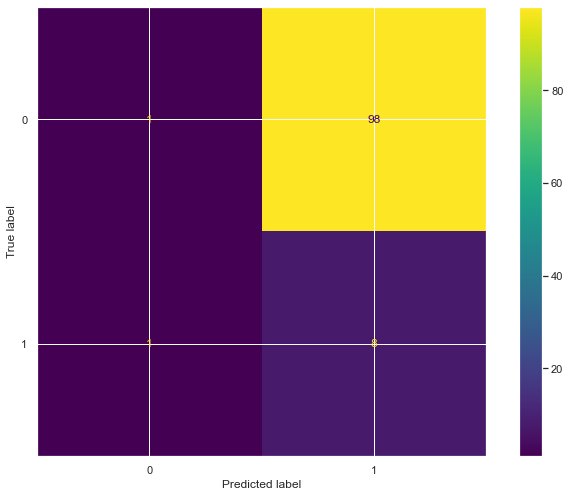

206    0.0
105    0.0
58     0.0
187    0.0
290    0.0
      ... 
24     0.0
339    1.0
298    0.0
239    0.0
5      0.0
Name: batched_3, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.8796296296296297
Mean Squared error LR- 0.9378857231185629
Accuracy: 0.12037037037037036
F1: 0.11114961448496924
Precision: 0.5560747663551402
Recall: 0.5052083333333334


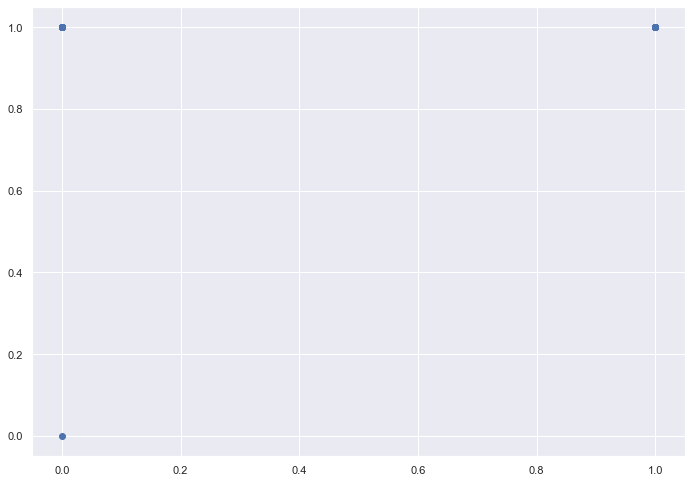

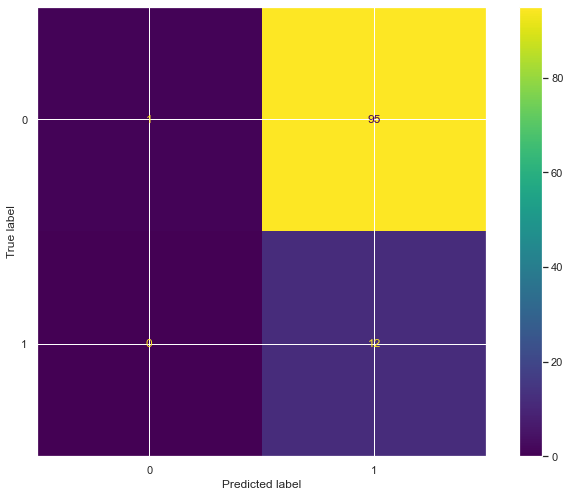

97     0.0
45     1.0
277    0.0
286    0.0
44     0.0
      ... 
48     0.0
312    0.0
345    0.0
280    0.0
126    0.0
Name: batched_4, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.8888888888888888
Mean Squared error LR- 0.9428090415820634
Accuracy: 0.1111111111111111
F1: 0.09999999999999999
Precision: 0.05555555555555555
Recall: 0.5


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


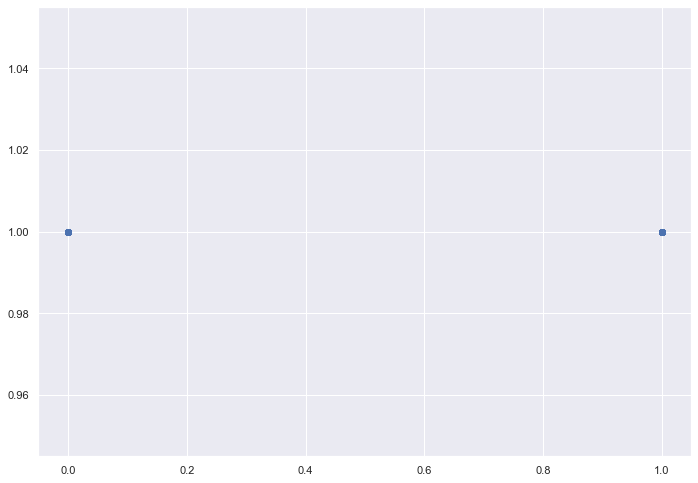

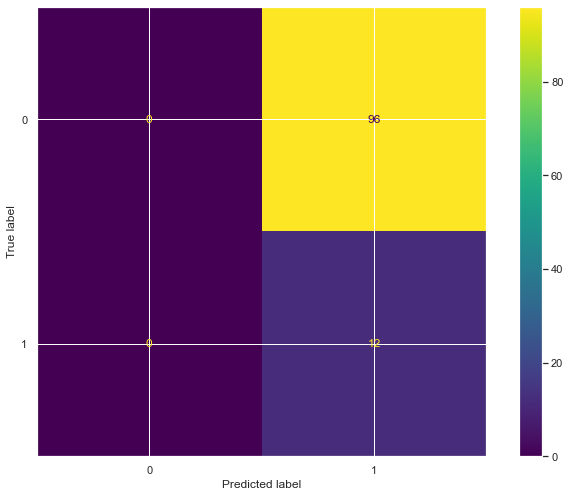

246    1.0
37     0.0
252    0.0
268    0.0
313    0.0
      ... 
26     0.0
5      0.0
345    0.0
297    0.0
249    0.0
Name: batched_5, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  1
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.8981481481481481
Mean Squared error LR- 0.9477067838462212
Accuracy: 0.10185185185185185
F1: 0.09243697478991596
Precision: 0.05092592592592592
Recall: 0.5


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


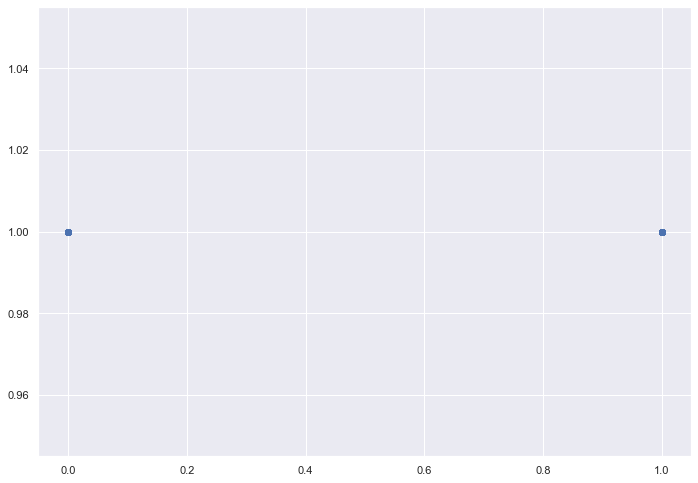

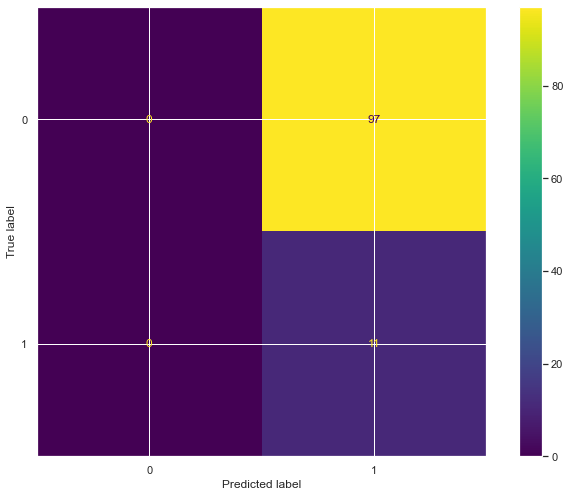

51     0.0
83     0.0
174    0.0
69     0.0
37     0.0
      ... 
293    0.0
252    1.0
188    0.0
273    1.0
358    1.0
Name: batched_6, Length: 108, dtype: float64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
103  1
104  1
105  1
106  0
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.9351851851851852
Mean Squared error LR- 0.9670497325294006
Accuracy: 0.06481481481481481
F1: 0.06086956521739131
Precision: 0.03398058252427184
Recall: 0.2916666666666667


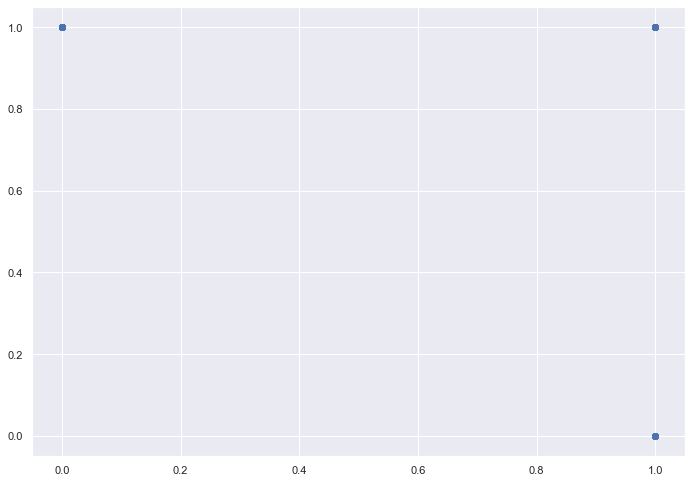

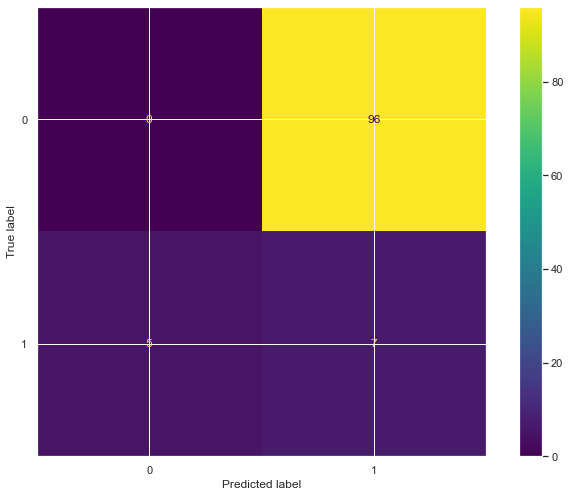

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
def trainlrmultiple(y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
    #Y_test_pred = pd.DataFrame(model.predict(x_test)).applymap(lambda x: 1 if x>0.5 else 0)
    Y_test_pred = pd.DataFrame(model.predict(x_test)).applymap(lambda x: 0 if x>0.5 else 1)
    plt.scatter(y_test, Y_test_pred)
    from sklearn import metrics
    print(y_test)
    print(Y_test_pred)
    print("Mean absolute error LR-",metrics.mean_absolute_error(y_test, Y_test_pred))
    metrics.mean_squared_error(y_test, Y_test_pred)
    print("Mean Squared error LR-",np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))
    print("Accuracy:",accuracy_score(y_test, Y_test_pred))
    print("F1:",f1_score(y_test, Y_test_pred, average="macro"))
    print("Precision:",precision_score(y_test, Y_test_pred, average="macro"))
    print("Recall:",recall_score(y_test, Y_test_pred, average="macro"))
    cm = confusion_matrix(y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

x = predictordatedataframe[['index', 'tokenproduced_x', 'tokenconsumed_x', 'tokenleft_x','Count_x', 'WaitingDays', 'AverageWaitingTime',
       'rolledmean_x', 'totaltokenleft', 'Averagetokenleft',
       'totaltokenconsumed', 'Averagetokenconsumed', 'totaltokenproduced',
       'Averagetokenproduced','tokenproduced_y', 'tokenconsumed_y', 'tokenleft_y','Count_y',
       'rolledmean_y','chunkmean']]
for i in range(7):
    y = predictordatedataframe['batched_'+str(i)].fillna(0)
    trainlrmultiple(y)


[Text(137.57074468085105, 211.7178947368421, 'X[4] <= 11.72\ngini = 0.5\nsamples = 257\nvalue = [131, 126]'),
 Text(130.4473404255319, 200.2736842105263, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(144.69414893617022, 200.2736842105263, 'X[2] <= 58.5\ngini = 0.486\nsamples = 216\nvalue = [90, 126]'),
 Text(80.13829787234043, 188.82947368421054, 'X[4] <= 24.853\ngini = 0.492\nsamples = 112\nvalue = [63, 49]'),
 Text(53.42553191489362, 177.38526315789474, 'X[5] <= 702.5\ngini = 0.458\nsamples = 93\nvalue = [60, 33]'),
 Text(35.61702127659574, 165.94105263157894, 'X[2] <= 35.5\ngini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(21.370212765957447, 154.49684210526317, 'X[3] <= 27.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(14.246808510638298, 143.05263157894737, 'X[4] <= 18.72\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(7.123404255319149, 131.60842105263157, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(21.370212765957447, 131.60842105263157, 'gini = 0.0\nsa

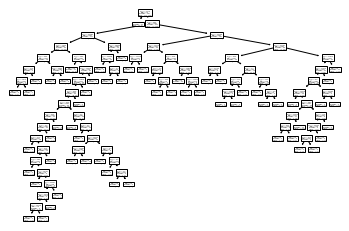

73     0.0
208    0.0
306    0.0
351    0.0
262    0.0
      ... 
198    0.0
287    1.0
23     0.0
173    0.0
93     1.0
Name: batched_0, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
..   ...
103  0.0
104  1.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.09259259259259259
Mean Squared error LR- 0.3042903097250923
Accuracy: 0.9074074074074074
F1: 0.696969696969697
Precision: 0.696969696969697
Recall: 0.696969696969697


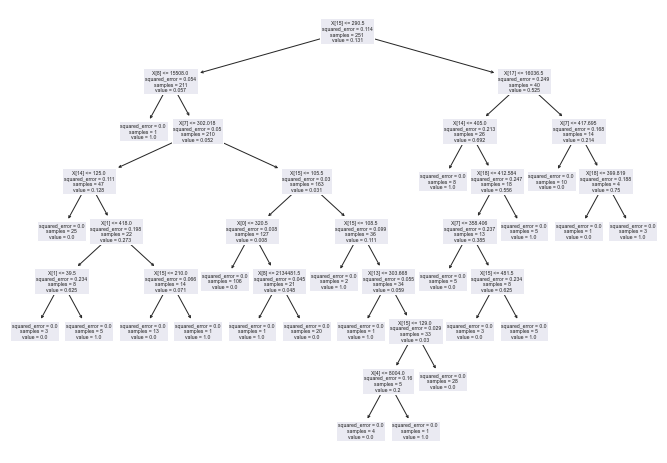

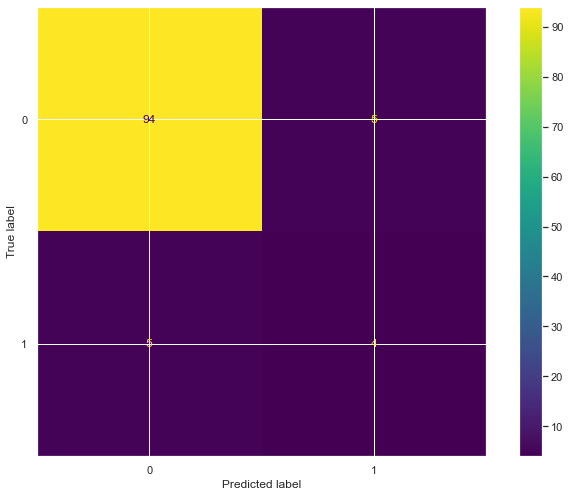

269    0.0
165    0.0
150    0.0
276    0.0
250    0.0
      ... 
31     0.0
249    0.0
37     0.0
53     0.0
221    0.0
Name: batched_1, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
103  0.0
104  0.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.16666666666666666
Mean Squared error LR- 0.408248290463863
Accuracy: 0.8333333333333334
F1: 0.5445173383317713
Precision: 0.5407608695652174
Recall: 0.5980392156862745


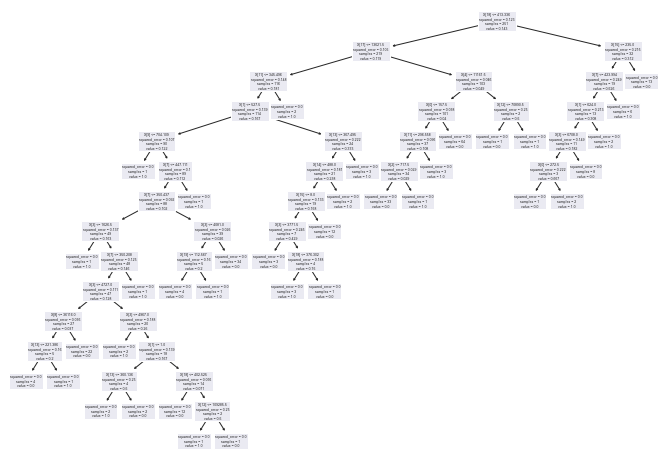

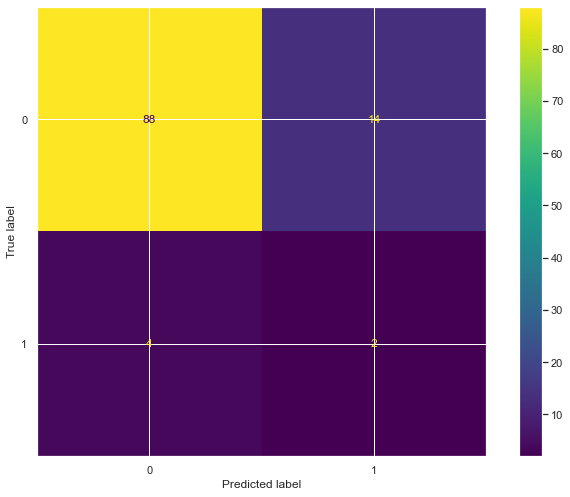

214    0.0
229    0.0
160    0.0
317    0.0
324    0.0
      ... 
126    0.0
159    0.0
299    0.0
294    0.0
296    0.0
Name: batched_2, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
..   ...
103  0.0
104  0.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.1388888888888889
Mean Squared error LR- 0.37267799624996495
Accuracy: 0.8611111111111112
F1: 0.6350529398513178
Precision: 0.6302083333333334
Recall: 0.64058106841612


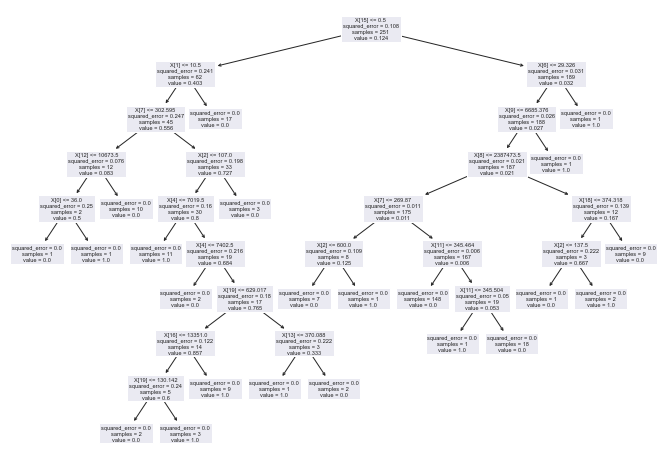

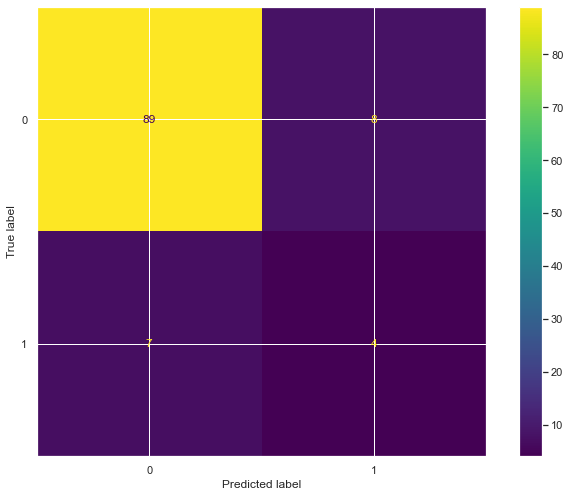

167    1.0
249    0.0
52     0.0
71     0.0
2      0.0
      ... 
11     0.0
250    0.0
297    0.0
166    0.0
205    0.0
Name: batched_3, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
103  0.0
104  0.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.16666666666666666
Mean Squared error LR- 0.408248290463863
Accuracy: 0.8333333333333334
F1: 0.4545454545454545
Precision: 0.4368932038834951
Recall: 0.47368421052631576


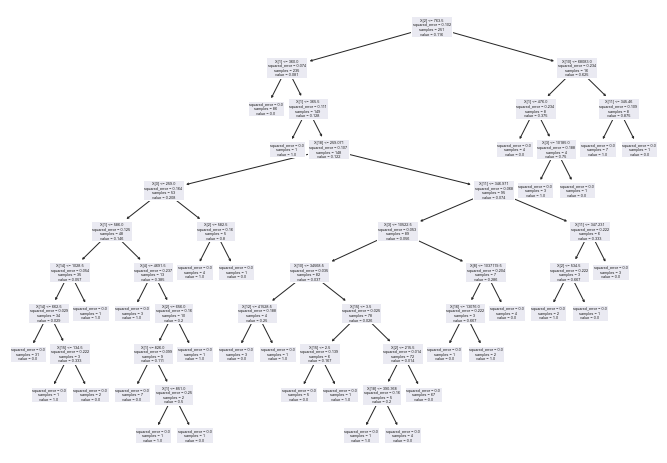

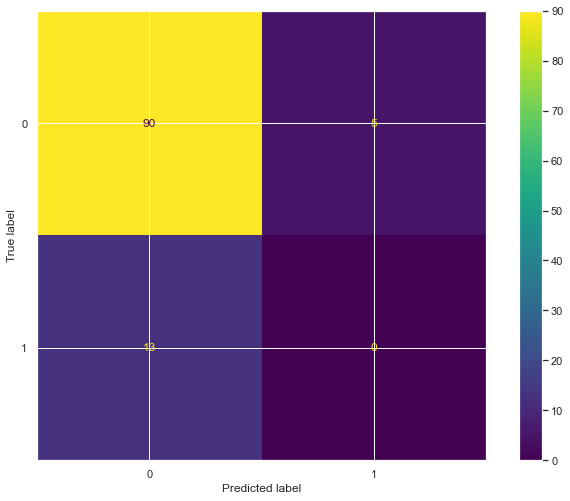

279    0.0
313    0.0
338    0.0
214    0.0
284    1.0
      ... 
10     1.0
101    1.0
202    0.0
9      0.0
110    0.0
Name: batched_4, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
103  1.0
104  0.0
105  0.0
106  1.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.17592592592592593
Mean Squared error LR- 0.41943524640393054
Accuracy: 0.8240740740740741
F1: 0.5978835978835979
Precision: 0.609375
Recall: 0.5903225806451613


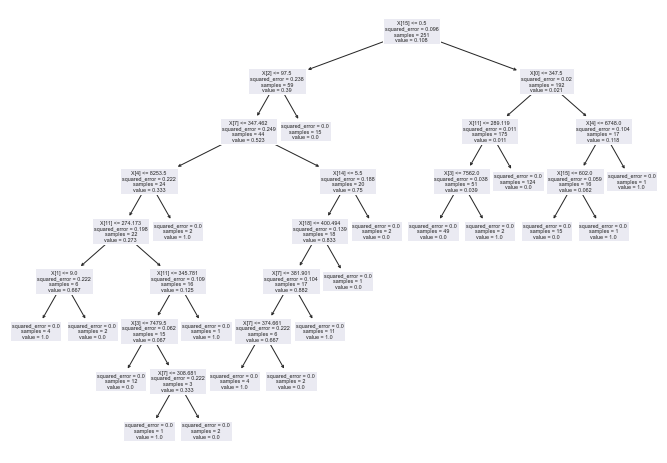

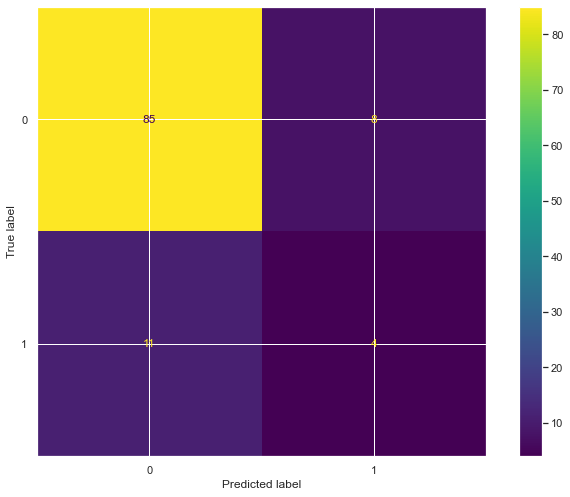

50     1.0
246    1.0
356    0.0
40     0.0
178    0.0
      ... 
25     0.0
351    0.0
238    0.0
45     0.0
95     0.0
Name: batched_5, Length: 108, dtype: float64
       0
0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
..   ...
103  0.0
104  0.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.21296296296296297
Mean Squared error LR- 0.46147910349544863
Accuracy: 0.7870370370370371
F1: 0.5886736214605067
Precision: 0.5910326086956521
Recall: 0.5866192630898514


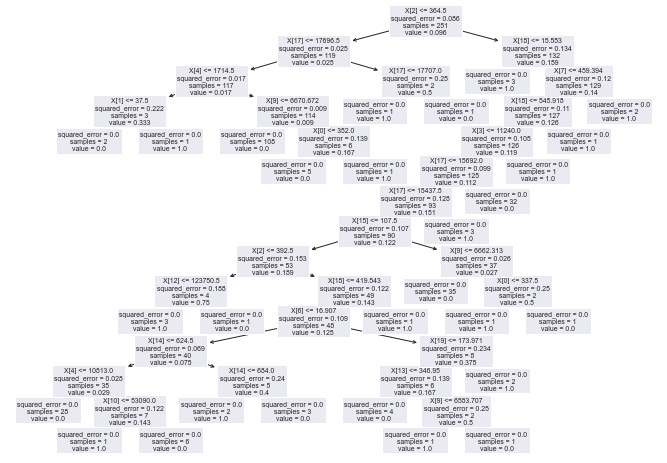

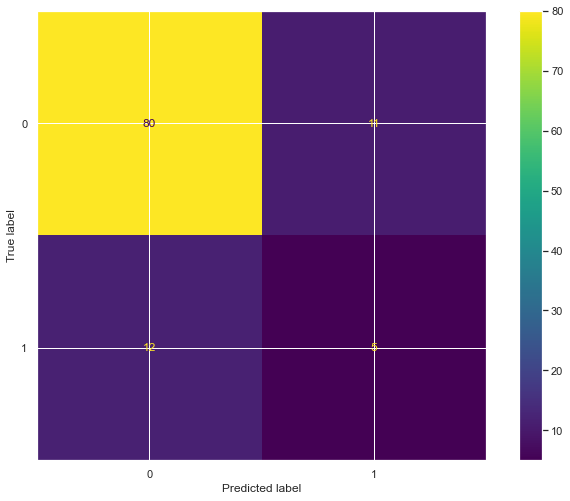

202    0.0
219    0.0
88     0.0
92     0.0
239    0.0
      ... 
111    0.0
33     0.0
272    0.0
75     0.0
228    0.0
Name: batched_6, Length: 108, dtype: float64
       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
103  0.0
104  0.0
105  0.0
106  0.0
107  0.0

[108 rows x 1 columns]
Mean absolute error LR- 0.027777777777777776
Mean Squared error LR- 0.16666666666666666
Accuracy: 0.9722222222222222
F1: 0.9270105879702635
Precision: 0.9114583333333334
Recall: 0.944236176194939


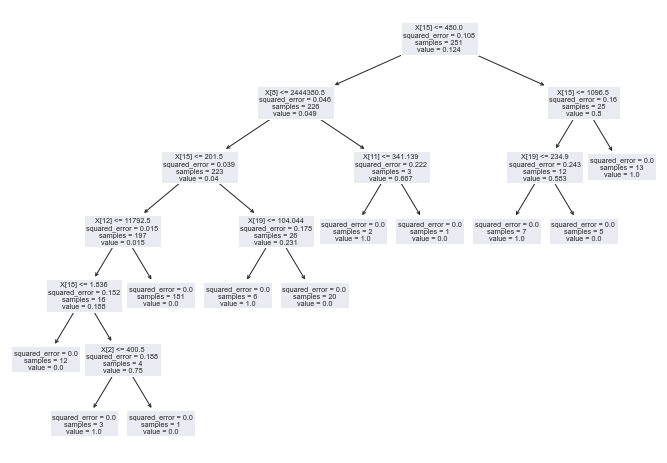

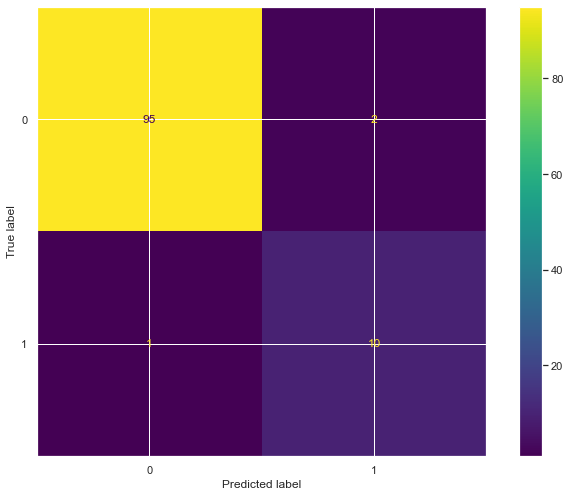

In [81]:
from sklearn import tree,metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def traindtmultiple(y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(x_train, y_train)
    prediction=clf.predict(x_test)
    tree.plot_tree(clf)
    Y_test_pred = pd.DataFrame(prediction)
    #Y_test_pred = pd.DataFrame(prediction)
    print(y_test)
    print(Y_test_pred)
    print("Mean absolute error LR-",metrics.mean_absolute_error(y_test, Y_test_pred))
    metrics.mean_squared_error(y_test, Y_test_pred)
    print("Mean Squared error LR-",np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))
    print("Accuracy:",accuracy_score(y_test, Y_test_pred))
    print("F1:",f1_score(y_test, Y_test_pred, average="macro"))
    print("Precision:",precision_score(y_test, Y_test_pred, average="macro"))
    print("Recall:",recall_score(y_test, Y_test_pred, average="macro"))
    cm = confusion_matrix(y_test, Y_test_pred)
    cm = confusion_matrix(y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

x = predictordatedataframe[['index', 'tokenproduced_x', 'tokenconsumed_x', 'tokenleft_x','Count_x', 'WaitingDays', 'AverageWaitingTime',
       'rolledmean_x', 'totaltokenleft', 'Averagetokenleft',
       'totaltokenconsumed', 'Averagetokenconsumed', 'totaltokenproduced',
       'Averagetokenproduced','tokenproduced_y', 'tokenconsumed_y', 'tokenleft_y','Count_y',
       'rolledmean_y','chunkmean']]
for i in range(7):
    y = predictordatedataframe['batched_'+str(i)].fillna(0)
    traindtmultiple(y)


159    0.0
64     0.0
256    0.0
154    1.0
330    0.0
      ... 
262    0.0
193    0.0
198    0.0
113    0.0
217    1.0
Name: batched_0, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    1
4    0
..  ..
103  0
104  0
105  0
106  0
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.1388888888888889
Mean Squared error LR- 0.37267799624996495
Accuracy: 0.8611111111111112
F1: 0.7317436661698957
Precision: 0.7262443438914028
Recall: 0.7377717391304348


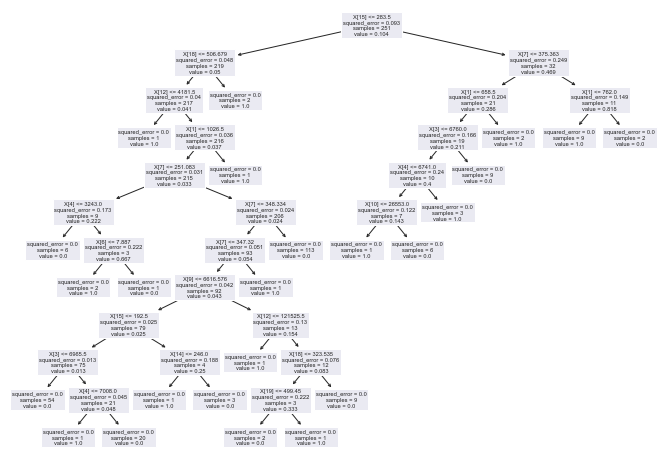

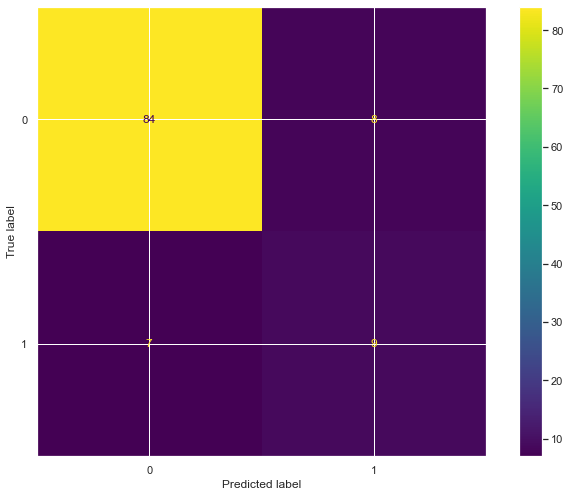

217    0.0
218    1.0
316    0.0
16     0.0
255    0.0
      ... 
157    0.0
147    0.0
215    0.0
250    0.0
1      1.0
Name: batched_1, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    0
4    0
..  ..
103  0
104  0
105  0
106  0
107  0

[108 rows x 1 columns]
Mean absolute error LR- 0.17592592592592593
Mean Squared error LR- 0.41943524640393054
Accuracy: 0.8240740740740741
F1: 0.5702617801047121
Precision: 0.5680161943319838
Recall: 0.5729166666666667


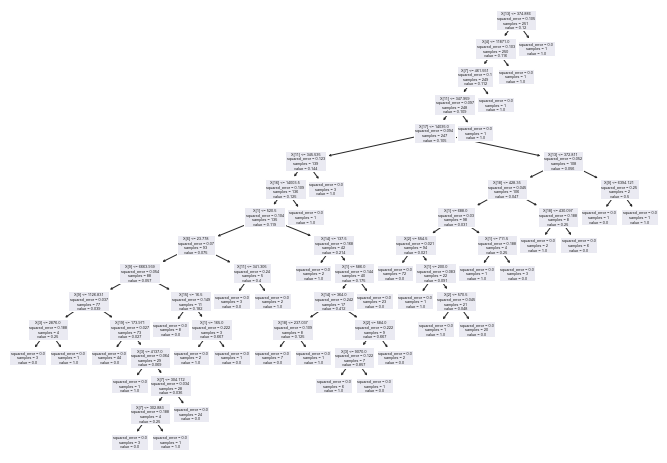

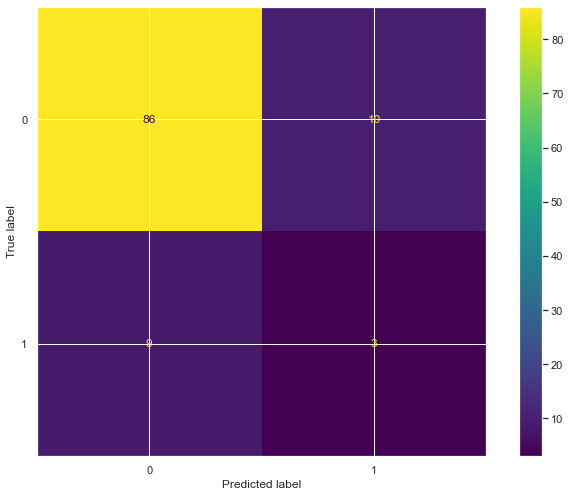

5      0.0
60     0.0
179    0.0
295    0.0
152    0.0
      ... 
226    0.0
141    0.0
279    0.0
183    0.0
280    0.0
Name: batched_2, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    0
4    0
..  ..
103  1
104  0
105  0
106  0
107  0

[108 rows x 1 columns]
Mean absolute error LR- 0.10185185185185185
Mean Squared error LR- 0.3191423692521127
Accuracy: 0.8981481481481481
F1: 0.7928509154315605
Precision: 0.8010752688172043
Recall: 0.7853260869565217


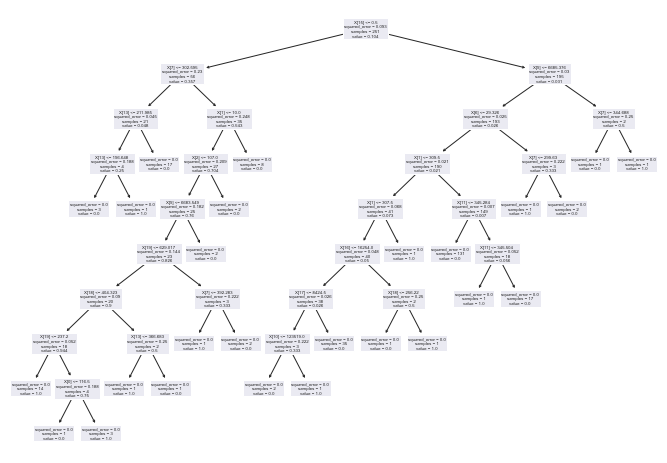

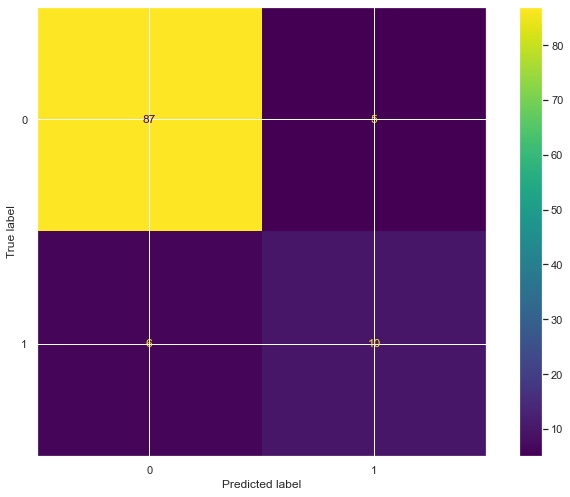

331    0.0
59     0.0
118    0.0
185    0.0
127    0.0
      ... 
104    0.0
194    0.0
148    0.0
257    0.0
32     0.0
Name: batched_3, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    0
4    0
..  ..
103  0
104  0
105  0
106  0
107  0

[108 rows x 1 columns]
Mean absolute error LR- 0.1574074074074074
Mean Squared error LR- 0.3967460238079361
Accuracy: 0.8425925925925926
F1: 0.509484370825541
Precision: 0.516973125884017
Recall: 0.5104166666666666


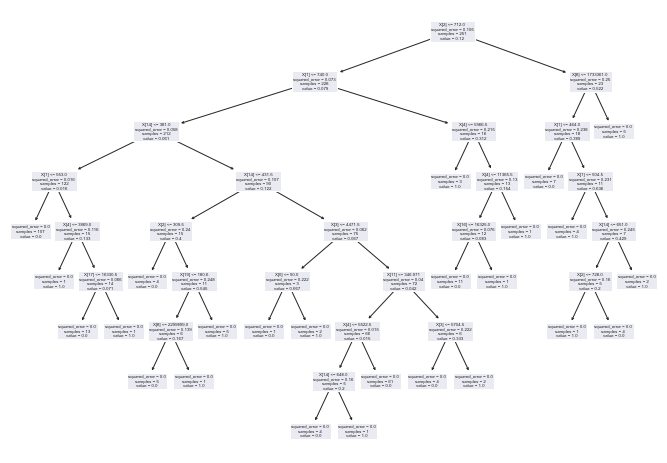

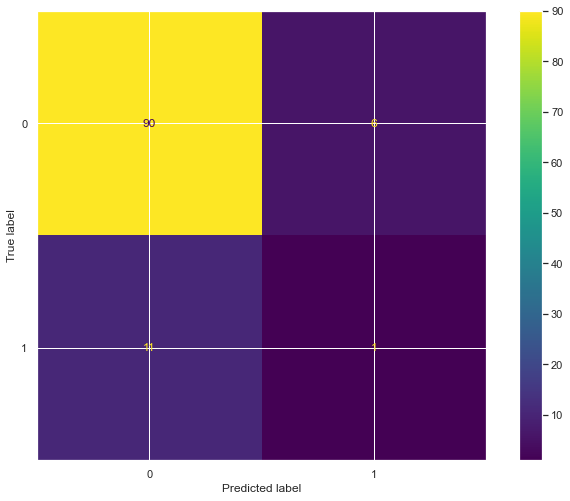

114    1.0
58     0.0
231    0.0
24     1.0
64     0.0
      ... 
279    0.0
39     0.0
18     0.0
304    0.0
14     0.0
Name: batched_4, Length: 108, dtype: float64
     0
0    0
1    0
2    1
3    1
4    0
..  ..
103  1
104  0
105  0
106  1
107  0

[108 rows x 1 columns]
Mean absolute error LR- 0.14814814814814814
Mean Squared error LR- 0.3849001794597505
Accuracy: 0.8518518518518519
F1: 0.6502024291497975
Precision: 0.6344086021505376
Recall: 0.6757263355201499


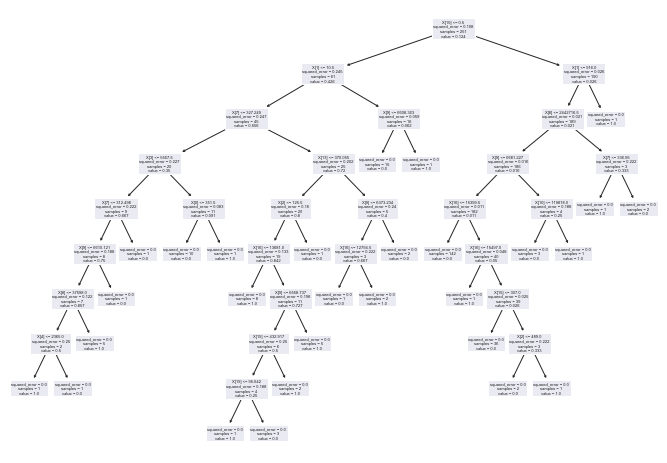

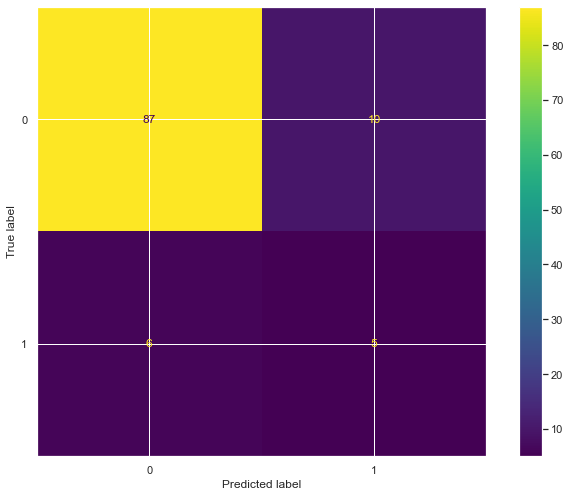

334    0.0
355    0.0
104    0.0
112    0.0
247    0.0
      ... 
60     0.0
6      0.0
48     0.0
84     0.0
251    0.0
Name: batched_5, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    0
4    0
..  ..
103  0
104  0
105  1
106  0
107  0

[108 rows x 1 columns]
Mean absolute error LR- 0.2037037037037037
Mean Squared error LR- 0.45133546692422
Accuracy: 0.7962962962962963
F1: 0.484375
Precision: 0.4858299595141701
Recall: 0.4835988753514527


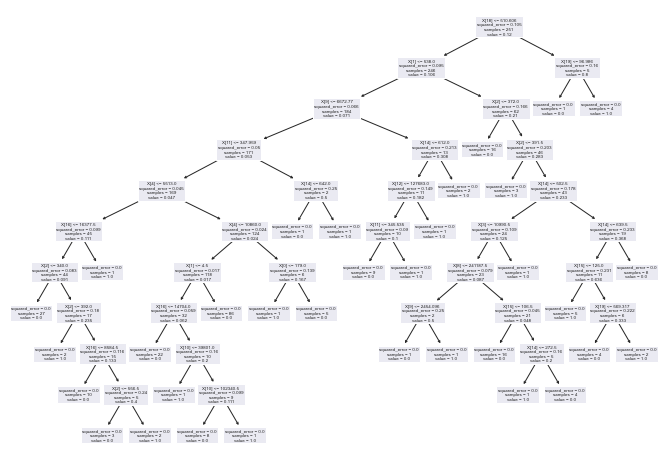

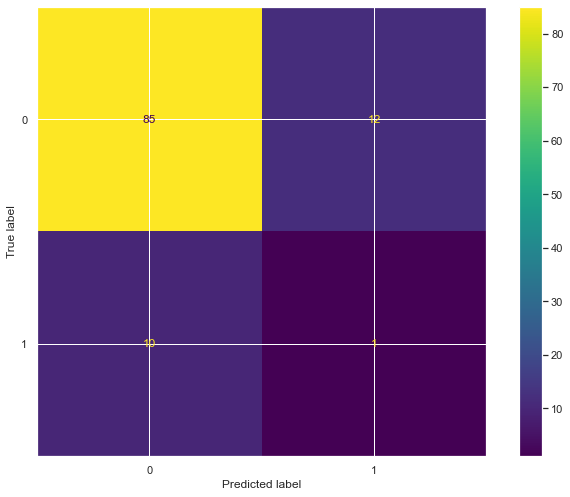

96     0.0
196    0.0
55     0.0
248    0.0
235    0.0
      ... 
260    0.0
243    0.0
42     0.0
54     0.0
357    0.0
Name: batched_6, Length: 108, dtype: float64
     0
0    0
1    0
2    0
3    0
4    0
..  ..
103  0
104  0
105  0
106  0
107  1

[108 rows x 1 columns]
Mean absolute error LR- 0.09259259259259259
Mean Squared error LR- 0.3042903097250923
Accuracy: 0.9074074074074074
F1: 0.765625
Precision: 0.765625
Recall: 0.765625


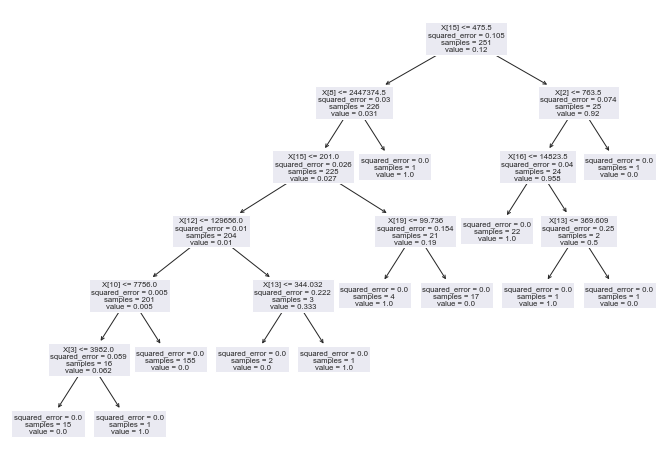

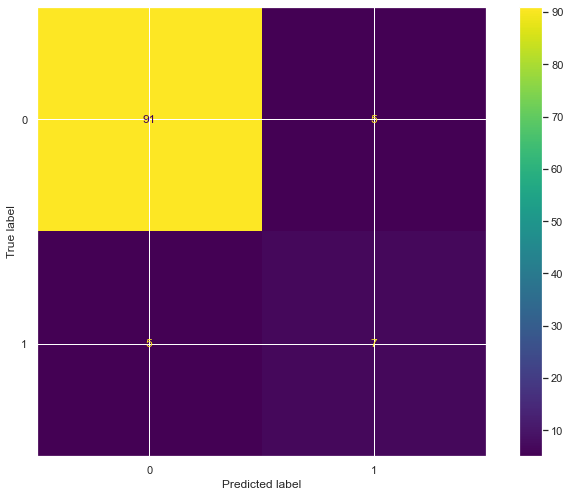

In [83]:
from sklearn import tree,metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def traindtmultiple(y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(x_train, y_train)
    prediction=clf.predict(x_test)
    tree.plot_tree(clf)
    Y_test_pred = pd.DataFrame(prediction).applymap(lambda x: 1 if x>0.5 else 0)
    #Y_test_pred = pd.DataFrame(prediction)
    print(y_test)
    print(Y_test_pred)
    print("Mean absolute error LR-",metrics.mean_absolute_error(y_test, Y_test_pred))
    metrics.mean_squared_error(y_test, Y_test_pred)
    print("Mean Squared error LR-",np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))
    print("Accuracy:",accuracy_score(y_test, Y_test_pred))
    print("F1:",f1_score(y_test, Y_test_pred, average="macro"))
    print("Precision:",precision_score(y_test, Y_test_pred, average="macro"))
    print("Recall:",recall_score(y_test, Y_test_pred, average="macro"))
    cm = confusion_matrix(y_test, Y_test_pred)
    cm = confusion_matrix(y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

x = predictordatedataframe[['index', 'tokenproduced_x', 'tokenconsumed_x', 'tokenleft_x','Count_x', 'WaitingDays', 'AverageWaitingTime',
       'rolledmean_x', 'totaltokenleft', 'Averagetokenleft',
       'totaltokenconsumed', 'Averagetokenconsumed', 'totaltokenproduced',
       'Averagetokenproduced','tokenproduced_y', 'tokenconsumed_y', 'tokenleft_y','Count_y',
       'rolledmean_y','chunkmean']]
for i in range(7):
    y = predictordatedataframe['batched_'+str(i)].fillna(0)
    traindtmultiple(y)
